# 🏦 Bank Kredit Satışları - Ətraflı Analitik Təhlil

## 2020-2025 Rüblük Məlumat Təhlili

Bu notebook bankımızın kredit satışlarını ətraflı təhlil edir və iqtisadi göstəricilərləkredit satışları arasındakı əlaqələri araşdırır.

---

### 📋 Təhlil Strukturu:

**I. Məlumatın Hazırlanması və İlkin Araşdırma**
- Məlumatın yüklənməsi və təmizlənməsi
- Əsas statistik göstəricilər
- Məlumat keyfiyyətinin qiymətləndirilməsi

**II. Korrelyasiya və Əlaqə Təhlili**
- Kredit satışlarına təsir edən amillər
- Güclü və zəif əlaqələrin müəyyənləşdirilməsi
- Risk faktorlarının identifikasiyası

**III. Makroiqtisadi Göstəricilər Təhlili**
- ÜDM (GDP) dinamikası və təsiri
- Neft qiymətləri və iqtisadiyyata təsiri
- Xarici ticarət dövriyyəsinin rolu

**IV. Bank Daxili Göstəricilər Təhlili**
- Kredit satışları dinamikası
- Problem kreditlər (NPL) və onların təsiri
- Müştəri bazası təhlili
- Gəlirlilik göstəriciləri (ROE/ROA)

**V. Çoxdəyişənli Əlaqə Təhlili**
- ÜDM və kredit satışları əlaqəsi
- Neft qiymətləri və kredit satışları
- NPL və kredit satışları (mənfi əlaqə)
- Tam korrelyasiya xəritəsi

**VI. Dərin Məlumat Təhlili (Deep Dive)**
- Trend analizi və pattern recognition
- Mövsümi təsirlər
- Outlier və anomaliyalar

**VII. Yekun Nəticələr və Strateji Tövsiyələr**
- Əsas tapıntılar
- Risk qiymətləndirməsi
- Təkmilləşdirmə sahələri

---

## I. MƏLUMAT HAZIRLIGI VƏ İLKİN ARAŞDIRMA

### 1.1 Kitabxanaların Yüklənməsi və Mühitin Hazırlanması

**Məqsəd:** Təhlil üçün lazım olan Python kitabxanalarını yükləyirik və vizualizasiya mühitini konfiqurasiya edirik.

In [1]:
# Məlumat təhlili kitabxanaları
import pandas as pd
import numpy as np
from scipy import stats

# Vizualizasiya
import matplotlib.pyplot as plt
import seaborn as sns

# Konfiqurasiya
import warnings
warnings.filterwarnings('ignore')

# Qrafik stilinin təyin edilməsi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11

# Pandas görünüş ayarları
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

print("="*100)
print("✅ SİSTEM HAZIRLIĞI")
print("="*100)
print(f"✅ Pandas versiyası: {pd.__version__}")
print(f"✅ NumPy versiyası: {np.__version__}")
print(f"✅ Matplotlib konfiqurasiyası tamamlandı")
print(f"✅ Analitik mühit hazırdır!")
print("="*100)
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix


✅ SİSTEM HAZIRLIĞI
✅ Pandas versiyası: 2.3.3
✅ NumPy versiyası: 2.2.6
✅ Matplotlib konfiqurasiyası tamamlandı
✅ Analitik mühit hazırdır!


### 1.2 Məlumatın Yüklənməsi və İlkin Baxış

**Məqsəd:** Excel faylından məlumatı oxuyub, strukturunu və keyfiyyətini yoxlayırıq.

In [2]:
# Məlumatın yüklənməsi
df = pd.read_excel('data/raw_data.xlsx')

# Sütun adlarını təmizləmək
df.columns = df.columns.str.strip()

# VACIB: Bütün sütunları (Rüblər istisna olmaqla) numeric-ə çeviririk
for col in df.columns:
    if col != 'Rüblər':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Vahid (unit) təsnifatı
min_manat_cols = ['GDP', 'Dövlət_Gəlirləri', 'Dövlət_Xərcləri', 'Əhalinin_nominal_gəlirləri',
                  'Əhalinin_banklardakı_əmanətləri', 'Orta_aylıq_əməkhaqqı', 'Xarici_ticarət_dövriyyəsi',
                  'İxrac', 'İdxal', 'Pul_bazası', 'Oil_Price', 'Tikinti-quraşdırma_işlərinə_sərf_edilmiş_vəsait',
                  'İstehlak_xərcləri', 'Yaşayış_evlərinin_tikintisinə_yönəldilmiş_investisiyalar',
                  'Mənzil_qiymətləri', 'Nağd_pul_kredit_satışı', 'Müştərilərə_verilmiş_kreditlər', 'NPLs']

faiz_cols = ['ROA', 'ROE', 'Net_Interest_Margin', 'Efficiency_Ratio', 'Loan-to-Deposit_Ratio', 'Uçot_faiz_dərəcəsi']

say_cols = ['Müştəri_sayı']

print("="*100)
print("📊 MƏLUMAT BAZASININ ÜMUMI GÖRÜNÜŞÜs")
print("="*100)
print(f"\n📏 Ölçü: {df.shape[0]} sətir × {df.shape[1]} sütun")
print(f"📅 Dövr: 2020-2025 (rüblük məlumat)")
print(f"📅 Dövr sütunu: Rüblər (Zaman indeksi)")
print(f"\n📋 Sütun adları vahid təsnifatına görə:\n")

print(f"💰 MİLYON MANAT ({len(min_manat_cols)} sütun):")
for col in min_manat_cols[:5]:
    if col in df.columns:
        print(f"   • {col}")
print(f"   ... və daha {len(min_manat_cols)-5} sütun")

print(f"\n📊 FAİZ ({len(faiz_cols)} sütun):")
for col in faiz_cols:
    if col in df.columns:
        print(f"   • {col}")

print(f"\n🔢 SAY ({len(say_cols)} sütun):")
for col in say_cols:
    if col in df.columns:
        print(f"   • {col}")

# Məlumat keyfiyyəti
total_cells = df.shape[0] * df.shape[1]
missing_cells = df.isnull().sum().sum()
data_quality = ((total_cells - missing_cells) / total_cells) * 100

print(f"\n✅ Məlumat Keyfiyyəti: {data_quality:.1f}%")
print(f"   • Tam hüceyrələr: {total_cells - missing_cells:,}")
print(f"   • Boş hüceyrələr: {missing_cells:,}")
print("="*100)

📊 MƏLUMAT BAZASININ ÜMUMI GÖRÜNÜŞÜs

📏 Ölçü: 26 sətir × 26 sütun
📅 Dövr: 2020-2025 (rüblük məlumat)
📅 Dövr sütunu: Rüblər (Zaman indeksi)

📋 Sütun adları vahid təsnifatına görə:

💰 MİLYON MANAT (18 sütun):
   • GDP
   • Dövlət_Gəlirləri
   • Dövlət_Xərcləri
   • Əhalinin_nominal_gəlirləri
   • Əhalinin_banklardakı_əmanətləri
   ... və daha 13 sütun

📊 FAİZ (6 sütun):
   • ROA
   • ROE
   • Net_Interest_Margin
   • Efficiency_Ratio
   • Loan-to-Deposit_Ratio
   • Uçot_faiz_dərəcəsi

🔢 SAY (1 sütun):
   • Müştəri_sayı

✅ Məlumat Keyfiyyəti: 84.6%
   • Tam hüceyrələr: 572
   • Boş hüceyrələr: 104


### 1.3 Rəqəmsal Məlumatın Seçilməsi və Ətraflı Statistika

**Məqsəd:** Yalnız rəqəmsal sütunları seçib, ətraflı statistik təhlil aparırıq.

**Nəyə baxırıq:**
- **Ortalama (Mean):** Verilənlərin mərkəzi
- **Standart Sapma (Std):** Dəyişkənlik dərəcəsi
- **Min/Max:** Diapazon
- **Percentiles:** Verilənlərin paylanması

In [3]:
# Yalnız rəqəmsal sütunları seçmək (Rüblər istisna)
numeric_df = df.select_dtypes(include=[np.number])

print("="*100)
print("📈 RƏQƏMSAL GÖSTƏRİCİLƏR - ƏTRAFLIIN STATİSTİKA")
print("="*100)
print(f"\nRəqəmsal sütun sayı: {numeric_df.shape[1]}")
print(f"Tam müşahidə sayı: {numeric_df.shape[0]}\n")

# Əsas göstəricilər üzrə ətraflı statistika
key_metrics = ['GDP', 'Oil_Price', 'Nağd_pul_kredit_satışı', 'NPLs', 'ROE', 'ROA', 'Müştəri_sayı']
key_metrics = [m for m in key_metrics if m in numeric_df.columns]

# Vahid məlumatı funksiyası
def get_unit_label(col_name):
    if col_name == 'Oil_Price':
        return '$/barel'
    elif col_name in min_manat_cols:
        return 'milyon AZN'
    elif col_name in faiz_cols:
        return '%'
    elif col_name in say_cols:
        return 'say'
    else:
        return ''

# Vahid çevirməsi funksiyası (göstəriş üçün)
def get_display_value(col_name, value):
    if col_name in faiz_cols:
        return value * 100  # Faiz sütunları 0-1 aralığında saxlanılır
    elif col_name == 'Oil_Price':
        return value * 100  # Oil_Price $/barel olaraq göstərilir
    else:
        return value

print("🔍 ƏSAS GÖSTƏRİCİLƏR ÜZRƏ DETAL STATİSTİKA:\n")
for metric in key_metrics:
    data = numeric_df[metric].dropna()
    unit = get_unit_label(metric)
    
    # Display values with correct units
    display_data = pd.Series([get_display_value(metric, x) for x in data])
    
    print(f"{'='*100}")
    print(f"📊 {metric} ({unit})")
    print(f"{'='*100}")
    print(f"   Müşahidə sayı:        {len(data):,}")
    print(f"   Ortalama:             {display_data.mean():,.2f}")
    print(f"   Median (50%):         {display_data.median():,.2f}")
    print(f"   Standart Sapma:       {display_data.std():,.2f}")
    print(f"   Dəyişkənlik (CV):     {(display_data.std() / display_data.mean() * 100):.1f}%")
    print(f"   Minimum:              {display_data.min():,.2f}")
    print(f"   25% Percentil:        {display_data.quantile(0.25):,.2f}")
    print(f"   75% Percentil:        {display_data.quantile(0.75):,.2f}")
    print(f"   Maksimum:             {display_data.max():,.2f}")
    print(f"   Aralıq (Range):       {display_data.max() - display_data.min():,.2f}")
    
    # Skewness və Kurtosis
    if len(data) > 3:
        skew = stats.skew(display_data)
        kurt = stats.kurtosis(display_data)
        print(f"   Əyrilik (Skewness):   {skew:.3f} {'(Sağa əyri)' if skew > 0 else '(Sola əyri)' if skew < 0 else '(Simmetrik)'}")
        print(f"   Kurtosis:             {kurt:.3f}")
    print()

print("="*100)
print("💡 DƏYİŞKƏNLİK ANALİZİ:")
print("   • CV < 15%:  Aşağı dəyişkənlik (stabil)")
print("   • CV 15-30%: Orta dəyişkənlik")
print("   • CV > 30%:  Yüksək dəyişkənlik (risk)")
print("="*100)

📈 RƏQƏMSAL GÖSTƏRİCİLƏR - ƏTRAFLIIN STATİSTİKA

Rəqəmsal sütun sayı: 25
Tam müşahidə sayı: 26

🔍 ƏSAS GÖSTƏRİCİLƏR ÜZRƏ DETAL STATİSTİKA:

📊 GDP (milyon AZN)
   Müşahidə sayı:        22
   Ortalama:             27,773,990.91
   Median (50%):         30,014,250.00
   Standart Sapma:       6,159,270.64
   Dəyişkənlik (CV):     22.2%
   Minimum:              16,450,600.00
   25% Percentil:        21,967,675.00
   75% Percentil:        32,191,075.00
   Maksimum:             35,748,000.00
   Aralıq (Range):       19,297,400.00
   Əyrilik (Skewness):   -0.650 (Sola əyri)
   Kurtosis:             -1.058

📊 Oil_Price ($/barel)
   Müşahidə sayı:        22
   Ortalama:             12.74
   Median (50%):         13.42
   Standart Sapma:       3.40
   Dəyişkənlik (CV):     26.7%
   Minimum:              4.99
   25% Percentil:        11.60
   75% Percentil:        14.35
   Maksimum:             19.30
   Aralıq (Range):       14.31
   Əyrilik (Skewness):   -0.469 (Sola əyri)
   Kurtosis:            

### 1.4 Əksik Məlumatların Təhlili

**Məqsəd:** Hər sütunda neçə əksik məlumat var və bu bizə necə təsir edir?

In [4]:
# Əksik məlumatların təhlili
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Sütun': missing_data.index,
    'Əksik Sayı': missing_data.values,
    'Faiz (%)': missing_percent.values
})
missing_df = missing_df[missing_df['Əksik Sayı'] > 0].sort_values('Əksik Sayı', ascending=False)

print("="*100)
print("⚠️ ƏKSİK MƏLUMATLAR TƏHLİLİ")
print("="*100)
if len(missing_df) == 0:
    print("\n✅ Əla! Heç bir sütunda əksik məlumat yoxdur!")
else:
    print(f"\n⚠️ {len(missing_df)} sütunda əksik məlumat var:\n")
    for idx, row in missing_df.iterrows():
        bar = '█' * int(row['Faiz (%)'] / 5)
        print(f"   {row['Sütun']:50s}: {row['Əksik Sayı']:3.0f} ({row['Faiz (%)']:5.1f}%) {bar}")
    
    print(f"\n💡 YORUM:")
    critical = missing_df[missing_df['Faiz (%)'] > 20]
    if len(critical) > 0:
        print(f"   🔴 KRİTİK: {len(critical)} sütun 20%-dən çox əksikdir!")
    else:
        print(f"   ✅ Əksik məlumat səviyyəsi qəbul ediləndir (<20%)")

print("="*100)

⚠️ ƏKSİK MƏLUMATLAR TƏHLİLİ

⚠️ 26 sütunda əksik məlumat var:

   Rüblər                                            :   4 ( 15.4%) ███
   GDP                                               :   4 ( 15.4%) ███
   Müştəri_sayı                                      :   4 ( 15.4%) ███
   Loan-to-Deposit_Ratio                             :   4 ( 15.4%) ███
   Efficiency_Ratio                                  :   4 ( 15.4%) ███
   Net_Interest_Margin                               :   4 ( 15.4%) ███
   ROE                                               :   4 ( 15.4%) ███
   ROA                                               :   4 ( 15.4%) ███
   NPLs                                              :   4 ( 15.4%) ███
   Müştərilərə_verilmiş_kreditlər                    :   4 ( 15.4%) ███
   Nağd_pul_kredit_satışı                            :   4 ( 15.4%) ███
   Mənzil_qiymətləri                                 :   4 ( 15.4%) ███
   Yaşayış_evlərinin_tikintisinə_yönəldilmiş_investisiyalar:   4 ( 15.4%)

---
## II. KORRELYASİYA VƏ ƏLAQƏ TƏHLİLİ

### 2.1 Kredit Satışları ilə Əlaqəli Amillər

**Məqsəd:** Kredit satışlarına ən çox təsir edən amilləri tapırıq.

**Korrelyasiya izahı:**
- **+1.00:** Tam müsbət əlaqə (biri artanda digəri də artır)
- **0.00:** Heç bir əlaqə yoxdur
- **-1.00:** Tam mənfi əlaqə (biri artanda digəri azalır)

**Güc təsnifatı:**
- **0.7-1.0:** Çox güclü əlaqə
- **0.5-0.7:** Güclü əlaqə
- **0.3-0.5:** Orta əlaqə
- **0.0-0.3:** Zəif əlaqə

In [5]:
# Korrelyasiya hesablanması
correlations = numeric_df.corr()['Nağd_pul_kredit_satışı'].sort_values(ascending=False)

print("="*100)
print("🔍 KREDİT SATIŞLARI İLƏ ƏLAQƏLƏR - DETAL TƏHLİL")
print("="*100)

# Müsbət əlaqələr
print("\n✅ MÜSBƏT ƏLAQƏLƏR (Birlikdə artır):\n")
positive_corr = correlations[correlations > 0].iloc[1:]  # Özü ilə korrelyasiyanı çıxarırıq
for idx, (col, val) in enumerate(positive_corr.items(), 1):
    # Güc indikə
    if abs(val) >= 0.7:
        strength = "ÇOX GÜCLÜ"
        stars = "⭐⭐⭐⭐⭐"
    elif abs(val) >= 0.5:
        strength = "GÜCLÜ"
        stars = "⭐⭐⭐⭐"
    elif abs(val) >= 0.3:
        strength = "ORTA"
        stars = "⭐⭐⭐"
    else:
        strength = "ZƏİF"
        stars = "⭐⭐"
    
    print(f"   {idx:2d}. {col:50s} | {val:+.3f} | {stars} {strength}")

# Mənfi əlaqələr
print("\n❌ MƏNFİ ƏLAQƏLƏR (Biri artanda digəri azalır):\n")
negative_corr = correlations[correlations < 0]
if len(negative_corr) > 0:
    for idx, (col, val) in enumerate(negative_corr.items(), 1):
        if abs(val) >= 0.5:
            strength = "GÜCLÜ"
            stars = "🔴🔴🔴🔴"
        elif abs(val) >= 0.3:
            strength = "ORTA"
            stars = "🔴🔴🔴"
        else:
            strength = "ZƏİF"
            stars = "🔴🔴"
        
        print(f"   {idx:2d}. {col:50s} | {val:+.3f} | {stars} {strength}")
else:
    print("   Heç bir mənfi əlaqə tapılmadı.")

# Top 5 prediktor
top_5 = correlations.iloc[1:6]
print("\n" + "="*100)
print("🏆 TOP 5 TƏSİR EDƏN AMİL:")
print("="*100)
for idx, (col, val) in enumerate(top_5.items(), 1):
    impact_pct = abs(val) * 100
    print(f"\n   {idx}. {col}")
    print(f"      • Korrelyasiya: {val:+.3f}")
    print(f"      • Təsir gücü: ~{impact_pct:.1f}%")
    print(f"      • Məna: {col} artdıqda kredit satışları {'artır' if val > 0 else 'azalır'}")

print("\n" + "="*100)
print("💡 NƏTİCƏ:")
print(f"   • Kredit satışları ən çox makroiqtisadi göstəricilərdən asılıdır")
print(f"   • ÜDM və neft qiyməti əsas prediktorlardır")
if len(negative_corr) > 0:
    print(f"   • NPL (problem kreditlər) kredit satışlarını mənfi təsir edir - idarə edilməlidir")
print("="*100)

🔍 KREDİT SATIŞLARI İLƏ ƏLAQƏLƏR - DETAL TƏHLİL

✅ MÜSBƏT ƏLAQƏLƏR (Birlikdə artır):

    1. GDP                                                | +0.777 | ⭐⭐⭐⭐⭐ ÇOX GÜCLÜ
    2. Oil_Price                                          | +0.764 | ⭐⭐⭐⭐⭐ ÇOX GÜCLÜ
    3. Xarici_ticarət_dövriyyəsi                          | +0.752 | ⭐⭐⭐⭐⭐ ÇOX GÜCLÜ
    4. İxrac                                              | +0.655 | ⭐⭐⭐⭐ GÜCLÜ
    5. Pul_bazası                                         | +0.598 | ⭐⭐⭐⭐ GÜCLÜ
    6. Əhalinin_nominal_gəlirləri                         | +0.598 | ⭐⭐⭐⭐ GÜCLÜ
    7. Əhalinin_banklardakı_əmanətləri                    | +0.576 | ⭐⭐⭐⭐ GÜCLÜ
    8. Müştərilərə_verilmiş_kreditlər                     | +0.558 | ⭐⭐⭐⭐ GÜCLÜ
    9. İdxal                                              | +0.547 | ⭐⭐⭐⭐ GÜCLÜ
   10. İstehlak_xərcləri                                  | +0.522 | ⭐⭐⭐⭐ GÜCLÜ
   11. Uçot_faiz_dərəcəsi                                 | +0.517 | ⭐⭐⭐⭐ GÜCLÜ
   12. Dövlət_Xərclə

### 2.2 Tam Korrelyasiya Matrisi - Heatmap Vizualizasiyası

**Məqsəd:** Bütün rəqəmsal dəyişənlər arasındakı əlaqələri vizual olaraq görmək.

**Rəng kodlaması:**
- 🔴 Qırmızı: Güclü müsbət əlaqə (+0.7 və yuxarı)
- 🟡 Sarı: Orta əlaqə (+0.3 ilə +0.7 arası)
- 🔵 Mavi: Zəif və ya mənfi əlaqə

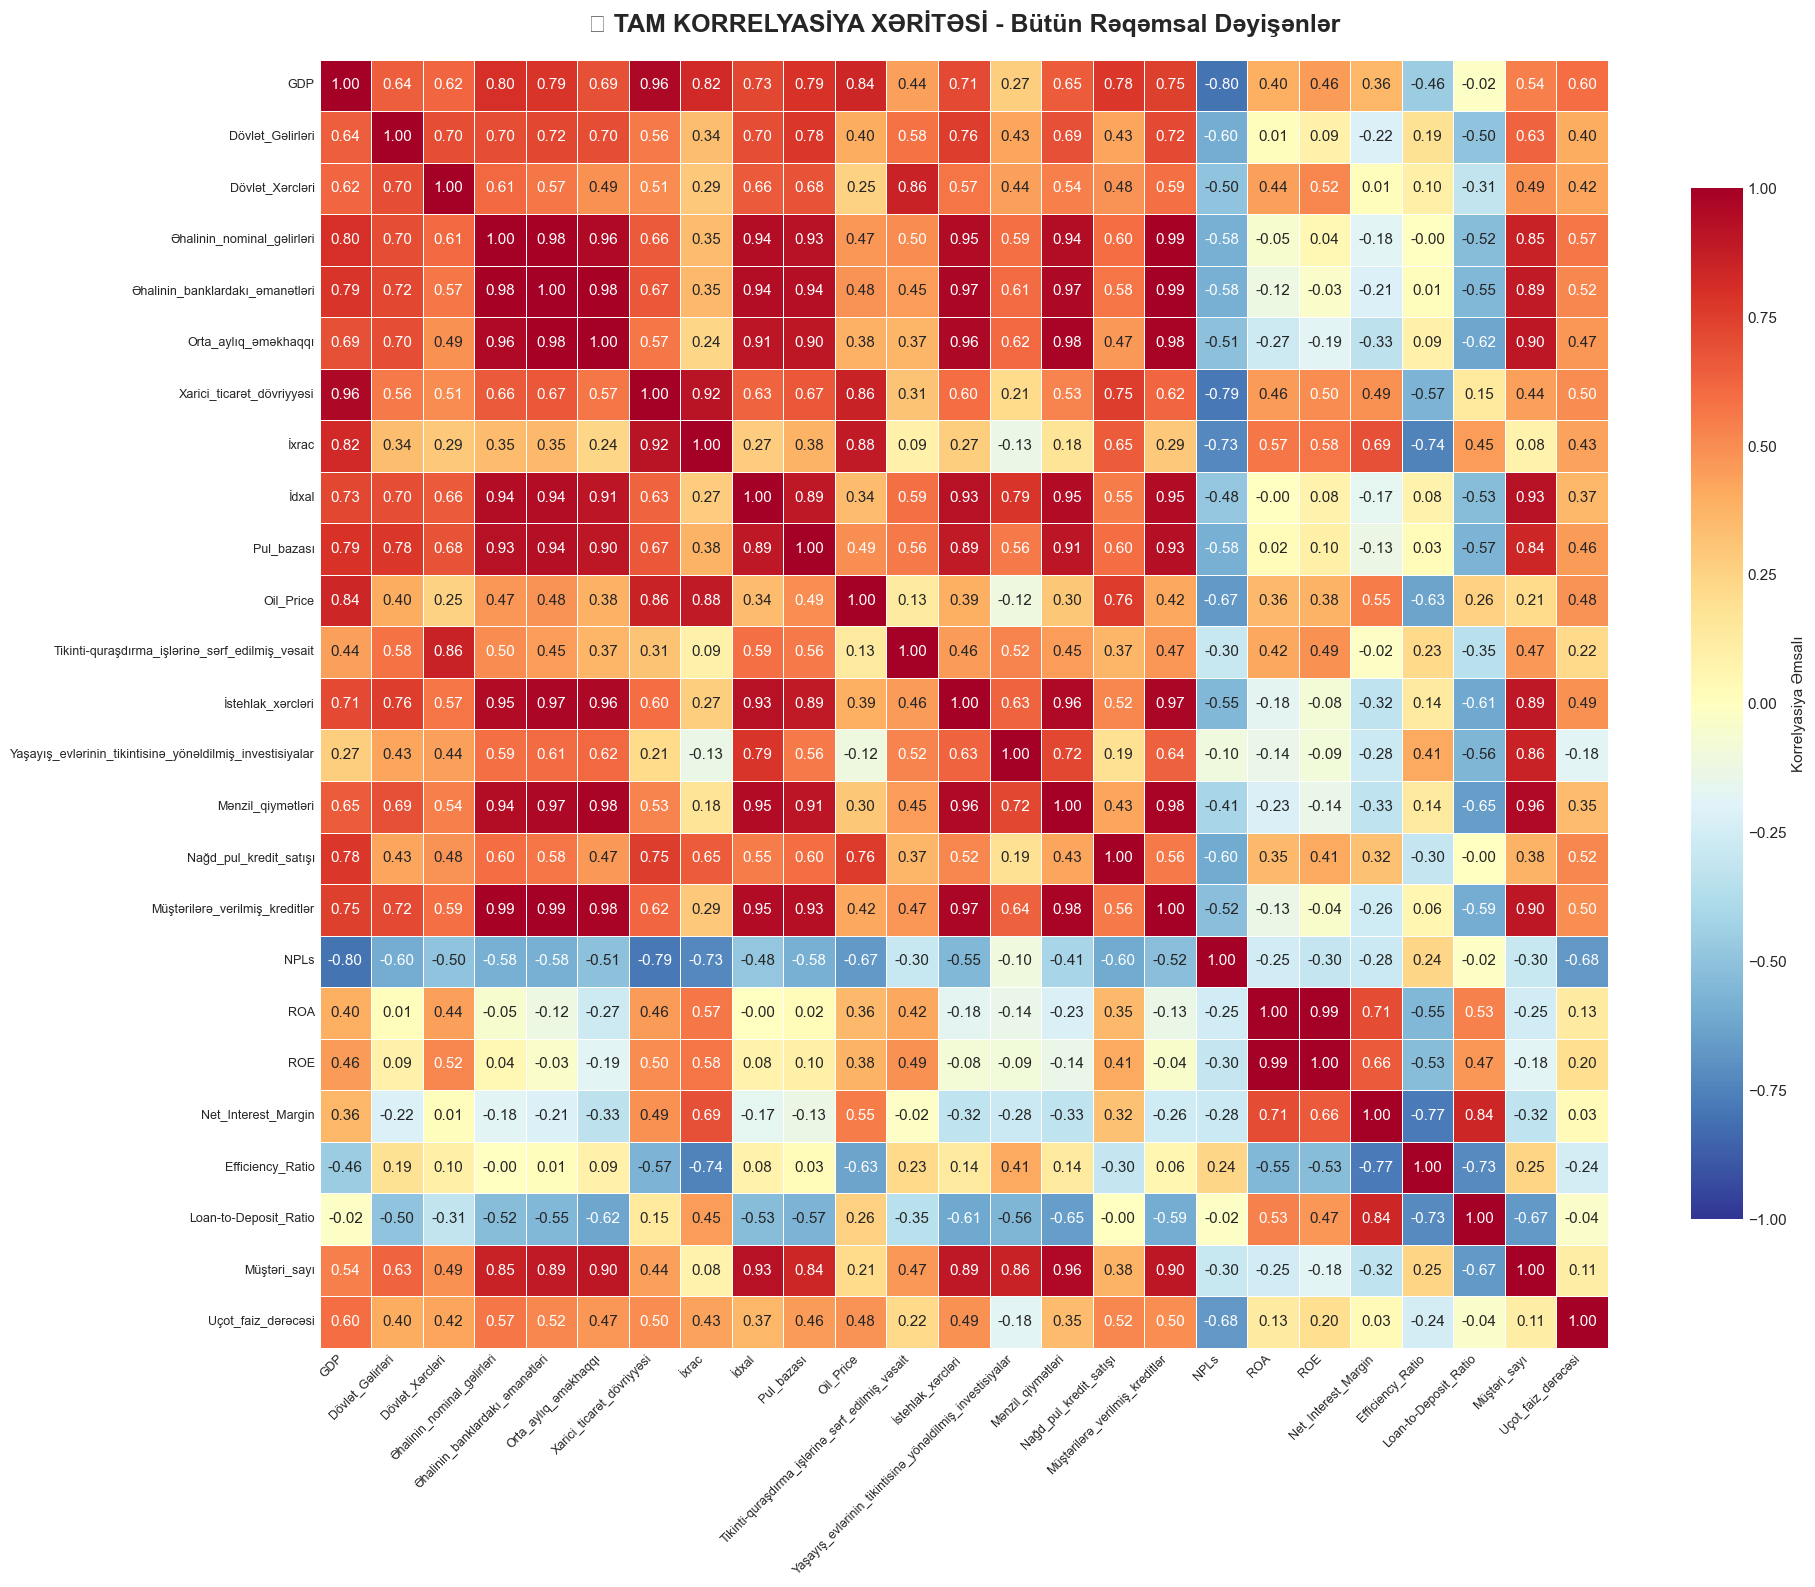


🔍 KORRELYASİYA XƏRİTƏSİ ANALİZİ

📊 RƏNGLƏRİN İZAHI:
   🔴 Qırmızı (1.0'a yaxın):    Çox güclü müsbət əlaqə
   🟡 Sarı (0.5 ətrafı):        Orta müsbət əlaqə
   ⚪ Ağ (0.0 ətrafı):          Əlaqə yoxdur
   🔵 Mavi (-1.0'a yaxın):      Güclü mənfi əlaqə

💡 NƏ AXTARMALIYIQ:
   • Kredit satışları ilə güclü müsbət əlaqələr (potensial prediktorlar)
   • Güclü mənfi əlaqələr (risk göstəriciləri)
   • Prediktorlar arasında yüksək əlaqələr (multicollinearity)


In [6]:
# TAM KORRELYASİYA HEATMAP - Bütün Dəyişənlər
plt.figure(figsize=(20, 16))

# Korrelyasiya matrisini hesabla
correlation_matrix = numeric_df.corr()

# Heatmap çək
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='RdYlBu_r',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Korrelyasiya Əmsalı"},
            vmin=-1, 
            vmax=1)

plt.title('🔥 TAM KORRELYASİYA XƏRİTƏSİ - Bütün Rəqəmsal Dəyişənlər', 
          fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

print("\n" + "="*100)
print("🔍 KORRELYASİYA XƏRİTƏSİ ANALİZİ")
print("="*100)
print("\n📊 RƏNGLƏRİN İZAHI:")
print("   🔴 Qırmızı (1.0'a yaxın):    Çox güclü müsbət əlaqə")
print("   🟡 Sarı (0.5 ətrafı):        Orta müsbət əlaqə") 
print("   ⚪ Ağ (0.0 ətrafı):          Əlaqə yoxdur")
print("   🔵 Mavi (-1.0'a yaxın):      Güclü mənfi əlaqə")

print("\n💡 NƏ AXTARMALIYIQ:")
print("   • Kredit satışları ilə güclü müsbət əlaqələr (potensial prediktorlar)")
print("   • Güclü mənfi əlaqələr (risk göstəriciləri)")
print("   • Prediktorlar arasında yüksək əlaqələr (multicollinearity)")
print("="*100)

### 2.2 Multicollinearity Yoxlaması

**Məqsəd:** Müstəqil dəyişənlər (predictors) arasında yüksək əlaqə varmı?

Yüksək multicollinearity problemi yarada bilər - məsələn, GDP və Neft qiyməti yüksək korrelyasiya göstərirsə, hər ikisini eyni anda istifadə etmək lazım deyil.

In [7]:
# Top 5 prediktor arasında korrelyasiya
top_features = top_5.index.tolist()
top_features_corr = numeric_df[top_features].corr()

print("="*100)
print("🔗 TOP PREDİKTORLAR ARASINDA ƏLAQƏ (Multicollinearity Yoxlaması)")
print("="*100)
print("\n📊 Korrelyasiya Matrisi:\n")
print(top_features_corr.round(3))

# Yüksək korrelyasiyaları tap
print("\n" + "="*100)
print("⚠️ YÜKSƏK ƏLAQƏLƏR (>0.7 - Diqqət tələb edir):")
print("="*100)
high_corr_found = False
for i in range(len(top_features)):
    for j in range(i+1, len(top_features)):
        corr_val = top_features_corr.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_found = True
            print(f"   • {top_features[i]} ↔ {top_features[j]}: {corr_val:+.3f}")
            print(f"     ⚠️ Bu göstəricilər bir-birindən asılıdır!")

if not high_corr_found:
    print("   ✅ Yüksək multicollinearity problemi yoxdur.")
    print("   ✅ Bütün top prediktorlar müstəqil məlumat verir.")

print("="*100)

🔗 TOP PREDİKTORLAR ARASINDA ƏLAQƏ (Multicollinearity Yoxlaması)

📊 Korrelyasiya Matrisi:

                           GDP  Oil_Price  Xarici_ticarət_dövriyyəsi  İxrac  \
GDP                       1.00       0.84                       0.96   0.82   
Oil_Price                 0.84       1.00                       0.86   0.89   
Xarici_ticarət_dövriyyəsi 0.96       0.86                       1.00   0.92   
İxrac                     0.82       0.89                       0.92   1.00   
Pul_bazası                0.79       0.49                       0.67   0.38   

                           Pul_bazası  
GDP                              0.79  
Oil_Price                        0.49  
Xarici_ticarət_dövriyyəsi        0.67  
İxrac                            0.38  
Pul_bazası                       1.00  

⚠️ YÜKSƏK ƏLAQƏLƏR (>0.7 - Diqqət tələb edir):
   • GDP ↔ Oil_Price: +0.837
     ⚠️ Bu göstəricilər bir-birindən asılıdır!
   • GDP ↔ Xarici_ticarət_dövriyyəsi: +0.961
     ⚠️ Bu göstəricilər bi

---
## III. MAKROİQTİSADİ GÖSTƏRİCİLƏR TƏHLİLİ

#### 3.1.1 ÜDM Trend Qrafiki

**İzahat:** ÜDM-in zaman içində necə dəyişdiyini göstərir. Qırmızı xətt ortalama səviyyədir.

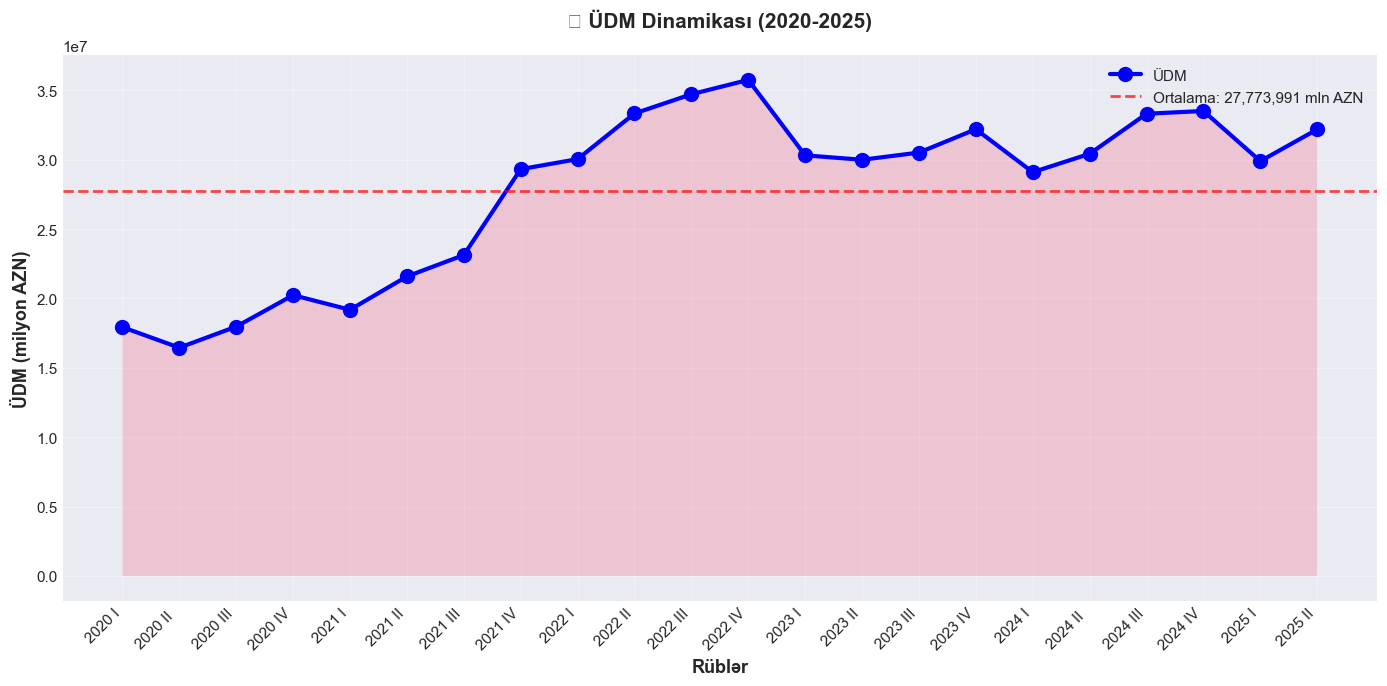


📊 ÜDM ƏSAS STATİSTİKA:
   Ortalama: 27,773,991 milyon AZN
   Min: 16,450,600 | Max: 35,748,000 milyon AZN
   Standart Sapma: 6,159,271 milyon AZN


In [8]:
# ÜDM Trend Qrafiki
gdp_data = numeric_df['GDP'].dropna()
quarters = df.loc[gdp_data.index, 'Rüblər'].values

plt.figure(figsize=(14, 7))
plt.plot(range(len(gdp_data)), gdp_data, 'b-', linewidth=3, marker='o', markersize=10, label='ÜDM')
plt.fill_between(range(len(gdp_data)), gdp_data, alpha=0.3)
plt.axhline(y=gdp_data.mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, 
            label=f'Ortalama: {gdp_data.mean():,.0f} mln AZN')
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('ÜDM (milyon AZN)', fontsize=13, fontweight='bold')
plt.title('📈 ÜDM Dinamikası (2020-2025)', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters)), quarters, rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 ÜDM ƏSAS STATİSTİKA:")
print(f"   Ortalama: {gdp_data.mean():,.0f} milyon AZN")
print(f"   Min: {gdp_data.min():,.0f} | Max: {gdp_data.max():,.0f} milyon AZN")
print(f"   Standart Sapma: {gdp_data.std():,.0f} milyon AZN")

#### 3.1.2 ÜDM Artım Tempi

**İzahat:** Hər rübdə ÜDM-in neçə faiz artdığını və ya azaldığını göstərir. Yaşıl = artım, Qırmızı = azalma.

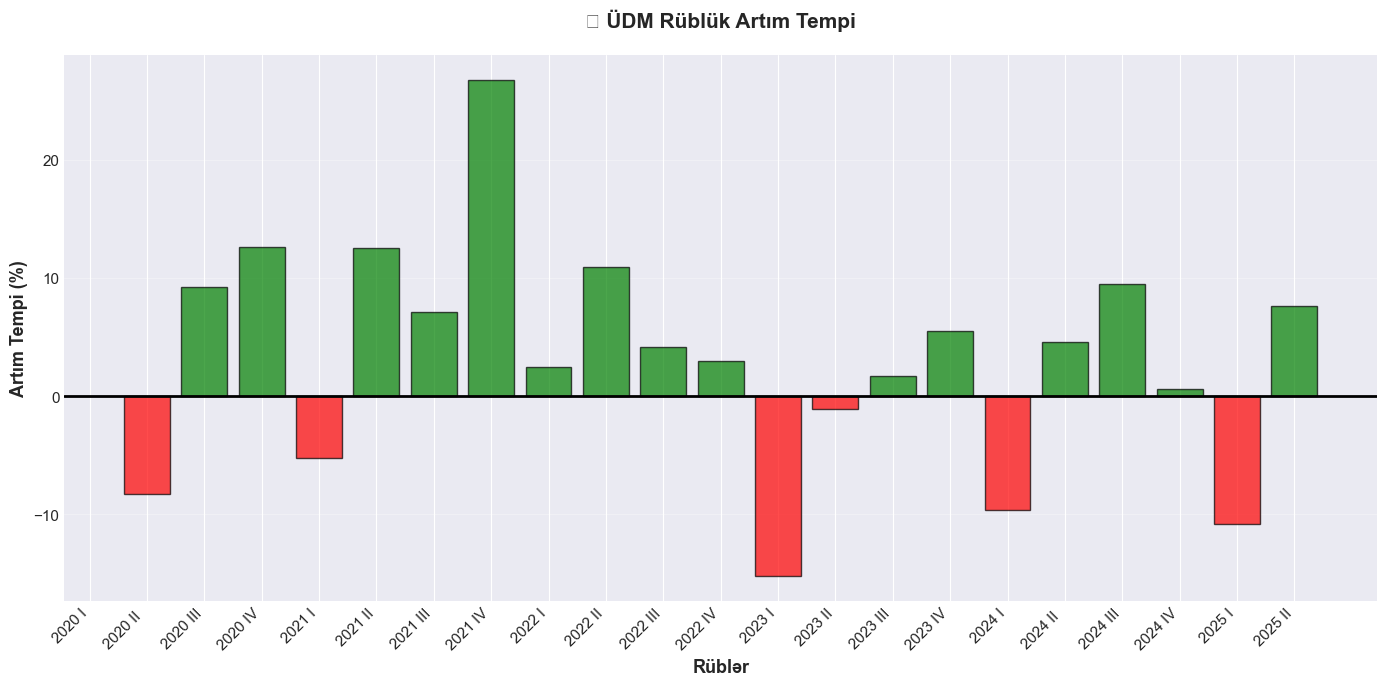


📈 ARTIM ANALİZİ:
   Ortalama rüblük artım: +3.25%
   Maksimum artım: +26.76%
   Maksimum azalma: -15.21%


In [9]:
# ÜDM Artım Tempi
gdp_growth = gdp_data.pct_change() * 100
colors = ['green' if x > 0 else 'red' for x in gdp_growth]

plt.figure(figsize=(14, 7))
plt.bar(range(len(gdp_growth)), gdp_growth, color=colors, alpha=0.7, edgecolor='black')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('Artım Tempi (%)', fontsize=13, fontweight='bold')
plt.title('📊 ÜDM Rüblük Artım Tempi', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters)), quarters, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n📈 ARTIM ANALİZİ:")
print(f"   Ortalama rüblük artım: {gdp_growth.mean():+.2f}%")
print(f"   Maksimum artım: {gdp_growth.max():+.2f}%")
print(f"   Maksimum azalma: {gdp_growth.min():+.2f}%")

#### 3.1.3 ÜDM Paylanması

**İzahat:** ÜDM dəyərlərinin tezlik paylanması. Hansı dəyərlər daha çox təkrarlanır?

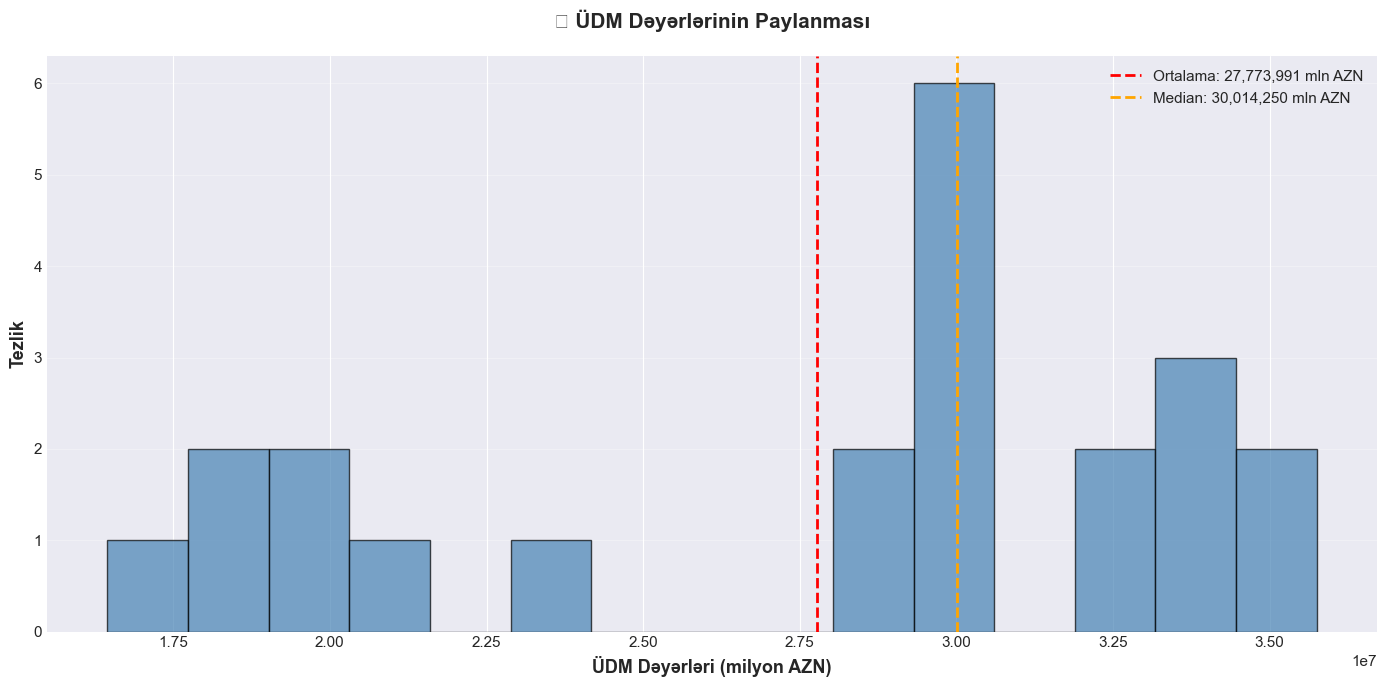


📊 PAYLANMA STATİSTİKASI:
   Median: 30,014,250 milyon AZN
   25% Percentil: 21,967,675 milyon AZN
   75% Percentil: 32,191,075 milyon AZN


In [10]:
# ÜDM Paylanması
plt.figure(figsize=(14, 7))
plt.hist(gdp_data, bins=15, color='steelblue', alpha=0.7, edgecolor='black')
plt.axvline(gdp_data.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Ortalama: {gdp_data.mean():,.0f} mln AZN')
plt.axvline(gdp_data.median(), color='orange', linestyle='--', linewidth=2, 
            label=f'Median: {gdp_data.median():,.0f} mln AZN')
plt.xlabel('ÜDM Dəyərləri (milyon AZN)', fontsize=13, fontweight='bold')
plt.ylabel('Tezlik', fontsize=13, fontweight='bold')
plt.title('📊 ÜDM Dəyərlərinin Paylanması', fontsize=15, fontweight='bold', pad=20)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n📊 PAYLANMA STATİSTİKASI:")
print(f"   Median: {gdp_data.median():,.0f} milyon AZN")
print(f"   25% Percentil: {gdp_data.quantile(0.25):,.0f} milyon AZN")
print(f"   75% Percentil: {gdp_data.quantile(0.75):,.0f} milyon AZN")

#### 3.1.4 ÜDM Box Plot və Outlier Yoxlaması

**İzahat:** Box plot outlier (kənar dəyər) varmı yoxlamaq üçün istifadə olunur. Qutunun içi 50% məlumatı göstərir.

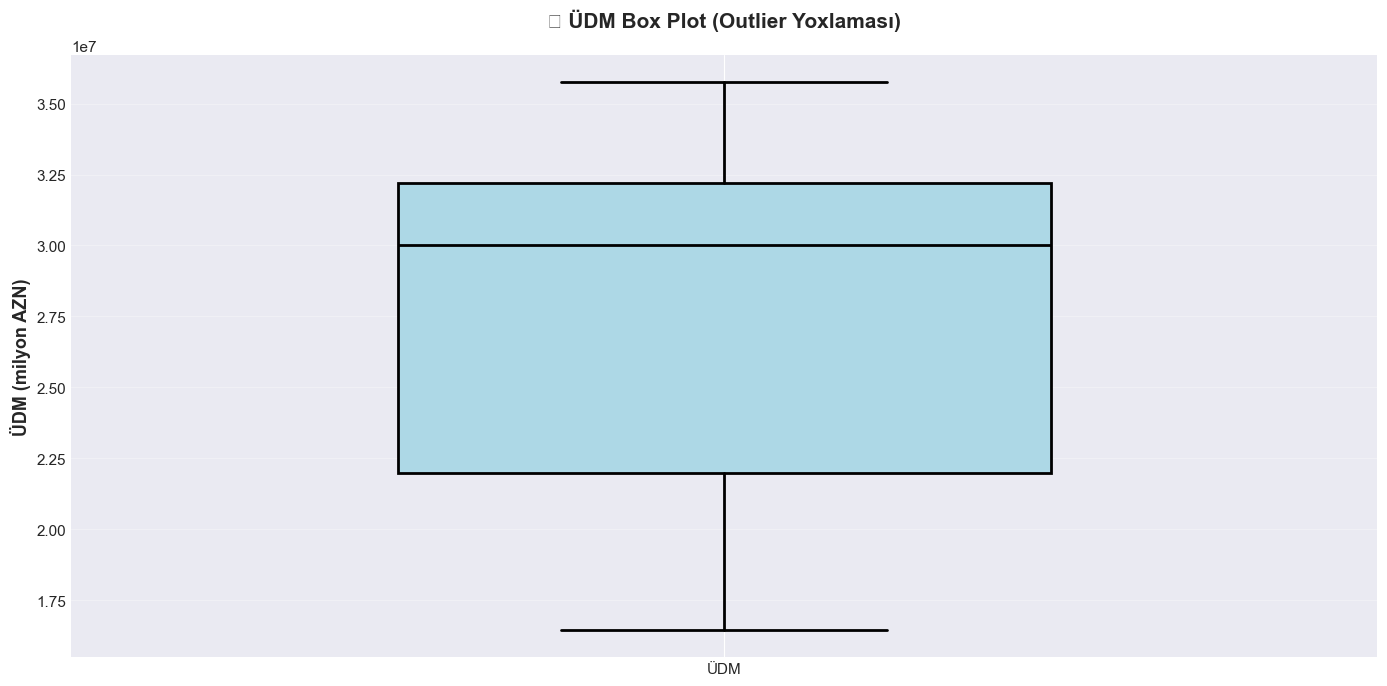


📦 BOX PLOT ANALİZİ:
   Q1 (25%): 21,967,675 milyon AZN
   Q2 (50% - Median): 30,014,250 milyon AZN
   Q3 (75%): 32,191,075 milyon AZN
   IQR: 10,223,400 milyon AZN


In [11]:
# ÜDM Box Plot
plt.figure(figsize=(14, 7))
box = plt.boxplot([gdp_data], vert=True, patch_artist=True, widths=0.5)
box['boxes'][0].set_facecolor('lightblue')
box['boxes'][0].set_edgecolor('black')
box['boxes'][0].set_linewidth(2)
for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(box[element], color='black', linewidth=2)
plt.ylabel('ÜDM (milyon AZN)', fontsize=13, fontweight='bold')
plt.title('📦 ÜDM Box Plot (Outlier Yoxlaması)', fontsize=15, fontweight='bold', pad=20)
plt.xticks([1], ['ÜDM'])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n📦 BOX PLOT ANALİZİ:")
print(f"   Q1 (25%): {gdp_data.quantile(0.25):,.0f} milyon AZN")
print(f"   Q2 (50% - Median): {gdp_data.median():,.0f} milyon AZN")
print(f"   Q3 (75%): {gdp_data.quantile(0.75):,.0f} milyon AZN")
print(f"   IQR: {gdp_data.quantile(0.75) - gdp_data.quantile(0.25):,.0f} milyon AZN")

#### 3.1.5 ÜDM Ümumi Təhlil və Nəticələr

In [12]:
# ÜDM Detallı Təhlil
print("="*100)
print("📊 ÜDM ÜMUMI TƏHLİL VƏ NƏTİCƏLƏR")
print("="*100)
print(f"\n📈 ƏSAS STATİSTİKALAR:")
print(f"   Müşahidə sayı:        {len(gdp_data)}")
print(f"   Ortalama ÜDM:         {gdp_data.mean():,.0f} milyon AZN")
print(f"   Median ÜDM:           {gdp_data.median():,.0f} milyon AZN")
print(f"   Standart Sapma:       {gdp_data.std():,.0f} milyon AZN")
print(f"   Dəyişkənlik (CV):     {(gdp_data.std()/gdp_data.mean()*100):.1f}%")

print(f"\n📊 DİAPAZON:")
print(f"   Minimum:              {gdp_data.min():,.0f} milyon AZN")
print(f"   Maksimum:             {gdp_data.max():,.0f} milyon AZN")
print(f"   Aralıq:               {gdp_data.max() - gdp_data.min():,.0f} milyon AZN")

print(f"\n📈 TREND ANALİZİ:")
total_growth = ((gdp_data.iloc[-1] / gdp_data.iloc[0]) - 1) * 100
avg_quarterly_growth = gdp_growth.mean()
print(f"   Ümumi artım:          {total_growth:+.2f}%")
print(f"   Ortalama rüblük artım: {avg_quarterly_growth:+.2f}%")
print(f"   Trend:                {'↗️ Artan' if total_growth > 0 else '↘️ Azalan' if total_growth < 0 else '→ Sabit'}")

print(f"\n🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:")
gdp_loan_corr = correlations['GDP']
print(f"   Korrelyasiya:         {gdp_loan_corr:+.3f}")
print(f"   Təsir gücü:           ~{abs(gdp_loan_corr)*100:.1f}%")
print(f"   Qiymət:               {'ÇOX GÜCLÜ MÜSBƏT əlaqə' if abs(gdp_loan_corr) > 0.7 else 'GÜCLÜ əlaqə'}")

print(f"\n💡 NƏTİCƏ:")
if total_growth > 0:
    print(f"   ✅ ÜDM artma trendindədir - kredit satışları üçün müsbət mühit")
else:
    print(f"   ⚠️ ÜDM azalma trendindədir - kredit satışları təzyiq altında ola bilər")

if (gdp_data.std()/gdp_data.mean()*100) < 15:
    print(f"   ✅ ÜDM sabit və proqnozlaşdırıla biləndir (CV < 15%)")
else:
    print(f"   ⚠️ ÜDM-də yüksək dəyişkənlik var - risk idarəetməsi lazımdır")

print("="*100)

📊 ÜDM ÜMUMI TƏHLİL VƏ NƏTİCƏLƏR

📈 ƏSAS STATİSTİKALAR:
   Müşahidə sayı:        22
   Ortalama ÜDM:         27,773,991 milyon AZN
   Median ÜDM:           30,014,250 milyon AZN
   Standart Sapma:       6,159,271 milyon AZN
   Dəyişkənlik (CV):     22.2%

📊 DİAPAZON:
   Minimum:              16,450,600 milyon AZN
   Maksimum:             35,748,000 milyon AZN
   Aralıq:               19,297,400 milyon AZN

📈 TREND ANALİZİ:
   Ümumi artım:          +79.52%
   Ortalama rüblük artım: +3.25%
   Trend:                ↗️ Artan

🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:
   Korrelyasiya:         +0.777
   Təsir gücü:           ~77.7%
   Qiymət:               ÇOX GÜCLÜ MÜSBƏT əlaqə

💡 NƏTİCƏ:
   ✅ ÜDM artma trendindədir - kredit satışları üçün müsbət mühit
   ⚠️ ÜDM-də yüksək dəyişkənlik var - risk idarəetməsi lazımdır


### 3.2 Neft Qiymətləri Təhlili

**Neft Azərbaycan üçün nə deməkdir?**
- Əsas ixrac məhsulu
- Dövlət büdcəsinin əsas mənbəyi
- Valyuta ehtiyatları
- İqtisadiyyatın "qan dövranı"

**Neft qiyməti yüksək olduqda:**
- Dövlət xərcləri artır → İnfrastruktur, sosial proqramlar
- Biznes investisiyaları artır
- İstehlak artır
- Bank kreditlərinə tələb artır

#### 3.2.1 Neft Qiyməti Trend Qrafiki

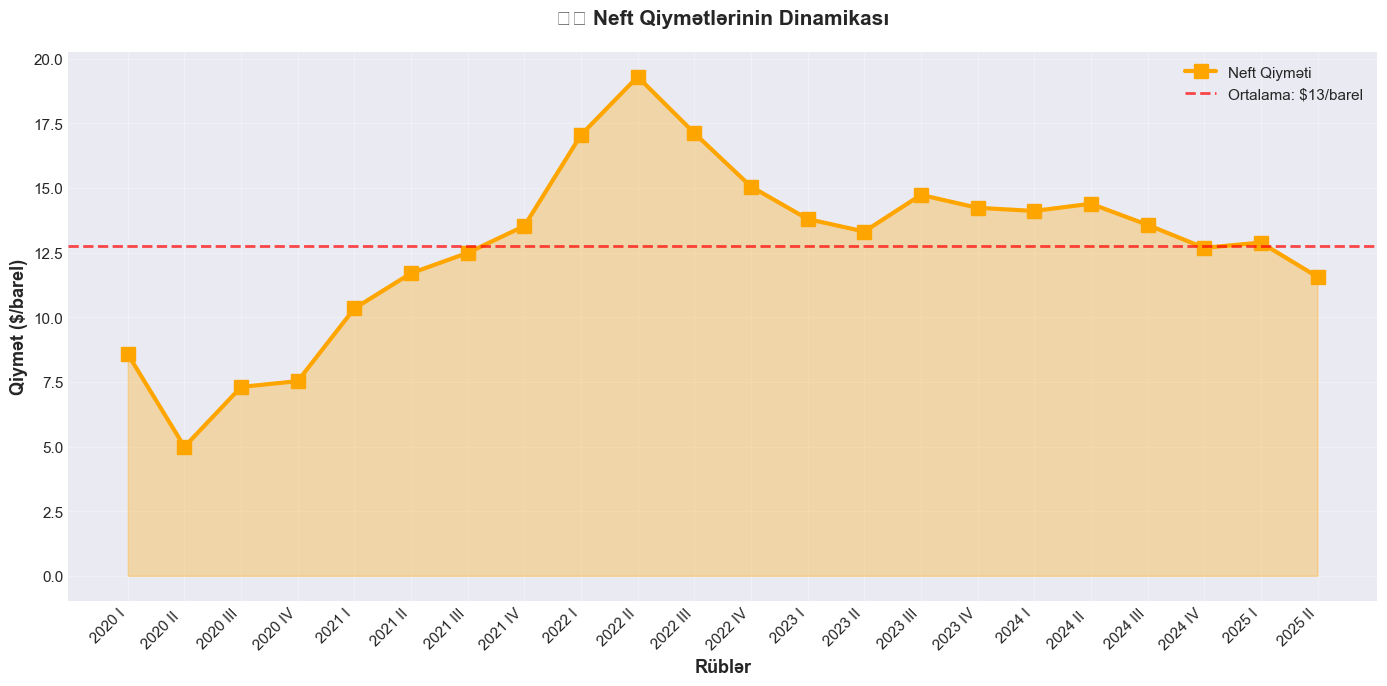


🛢️ NEFT QİYMƏTİ STATİSTİKA:
   Ortalama: $12.74/barel
   Min: $4.99 | Max: $19.30
   Standart Sapma: $3.40


In [13]:
# Neft Qiyməti Trend
oil_data_raw = numeric_df['Oil_Price'].dropna()
oil_data = oil_data_raw * 100  # $/barel
quarters_oil = df.loc[oil_data_raw.index, 'Rüblər'].values

plt.figure(figsize=(14, 7))
plt.plot(range(len(oil_data)), oil_data, 'orange', linewidth=3, marker='s', markersize=10, label='Neft Qiyməti')
plt.fill_between(range(len(oil_data)), oil_data, alpha=0.3, color='orange')
plt.axhline(y=oil_data.mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, 
            label=f'Ortalama: ${oil_data.mean():.0f}/barel')
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('Qiymət ($/barel)', fontsize=13, fontweight='bold')
plt.title('🛢️ Neft Qiymətlərinin Dinamikası', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters_oil)), quarters_oil, rotation=45, ha='right')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n🛢️ NEFT QİYMƏTİ STATİSTİKA:")
print(f"   Ortalama: ${oil_data.mean():.2f}/barel")
print(f"   Min: ${oil_data.min():.2f} | Max: ${oil_data.max():.2f}")
print(f"   Standart Sapma: ${oil_data.std():.2f}")

#### 3.2.2 Neft Qiyməti Rüblük Dəyişikliyi

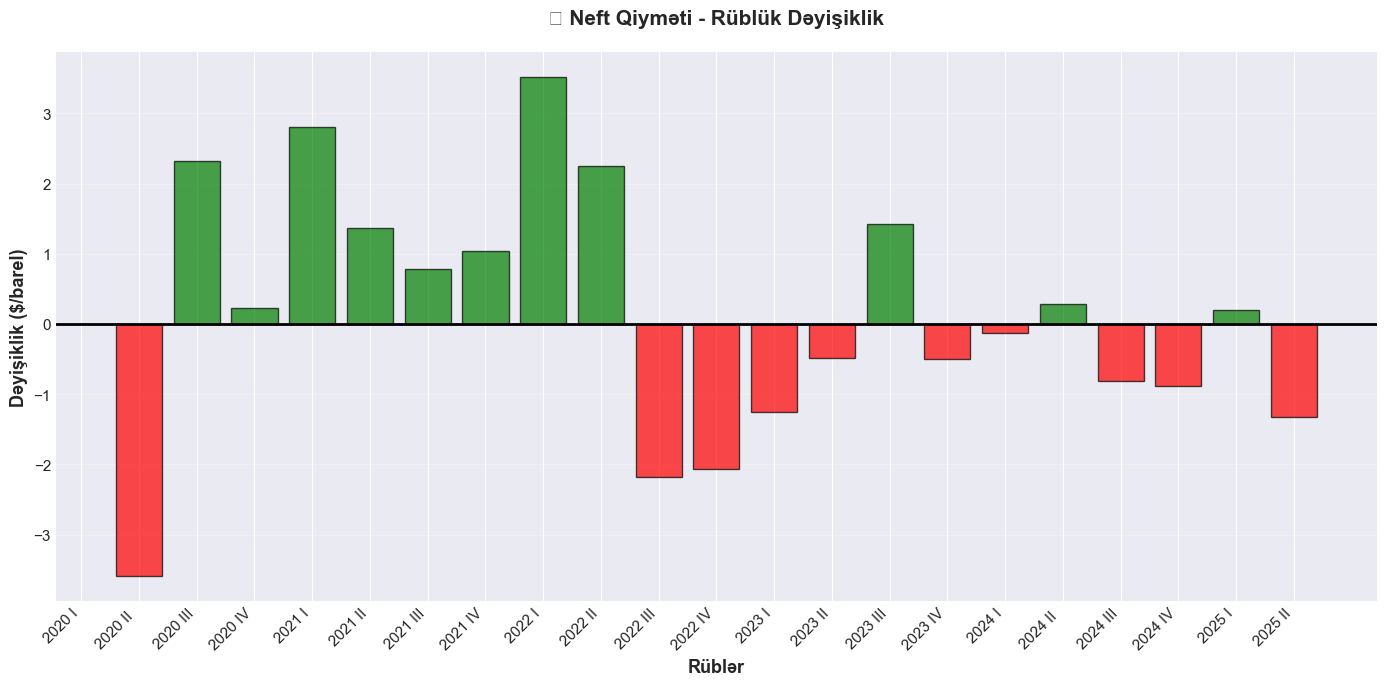


📊 DƏYİŞİKLİK ANALİZİ:
   Maksimum artım: $3.52
   Maksimum azalma: $-3.59
   Ortalama dəyişiklik: $1.40


In [14]:
# Neft Qiymət Dəyişikliyi
oil_change = oil_data.diff()
colors = ['green' if x > 0 else 'red' for x in oil_change]

plt.figure(figsize=(14, 7))
plt.bar(range(len(oil_change)), oil_change, color=colors, alpha=0.7, edgecolor='black')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('Dəyişiklik ($/barel)', fontsize=13, fontweight='bold')
plt.title('📊 Neft Qiyməti - Rüblük Dəyişiklik', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters_oil)), quarters_oil, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n📊 DƏYİŞİKLİK ANALİZİ:")
print(f"   Maksimum artım: ${oil_change.max():.2f}")
print(f"   Maksimum azalma: ${oil_change.min():.2f}")
print(f"   Ortalama dəyişiklik: ${oil_change.abs().mean():.2f}")

#### 3.2.3 Neft Qiyməti Zonaları

**Zona təsnifatı:**
- 🔴 Aşağı zona: <$60/barel (risk)
- 🟡 Orta zona: $60-80/barel (normal)
- 🟢 Yüksək zona: >$80/barel (əlverişli)

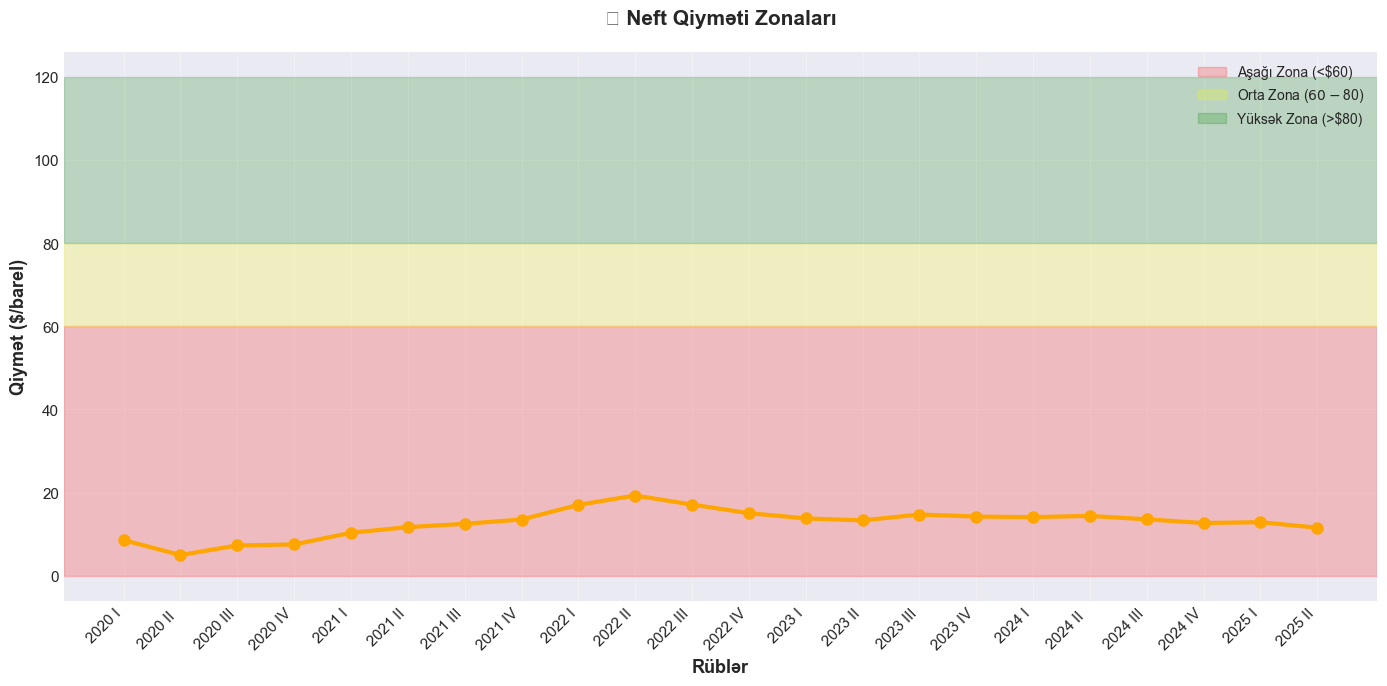


🎯 ZONA ANALİZİ:
   Aşağı zona (<$60):    22 rüb (100.0%)
   Orta zona ($60-$80):  0 rüb (0.0%)
   Yüksək zona (>$80):   0 rüb (0.0%)


In [15]:
# Neft Qiymət Zonası
plt.figure(figsize=(14, 7))
plt.plot(range(len(oil_data)), oil_data, 'orange', linewidth=3, marker='o', markersize=8)
plt.axhspan(0, 60, alpha=0.2, color='red', label='Aşağı Zona (<$60)')
plt.axhspan(60, 80, alpha=0.2, color='yellow', label='Orta Zona ($60-$80)')
plt.axhspan(80, 120, alpha=0.2, color='green', label='Yüksək Zona (>$80)')
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('Qiymət ($/barel)', fontsize=13, fontweight='bold')
plt.title('🎯 Neft Qiyməti Zonaları', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters_oil)), quarters_oil, rotation=45, ha='right')
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

low_zone = (oil_data < 60).sum()
mid_zone = ((oil_data >= 60) & (oil_data < 80)).sum()
high_zone = (oil_data >= 80).sum()
print(f"\n🎯 ZONA ANALİZİ:")
print(f"   Aşağı zona (<$60):    {low_zone} rüb ({low_zone/len(oil_data)*100:.1f}%)")
print(f"   Orta zona ($60-$80):  {mid_zone} rüb ({mid_zone/len(oil_data)*100:.1f}%)")
print(f"   Yüksək zona (>$80):   {high_zone} rüb ({high_zone/len(oil_data)*100:.1f}%)")

#### 3.2.4 Neft Qiyməti Volatility (Dəyişkənlik)

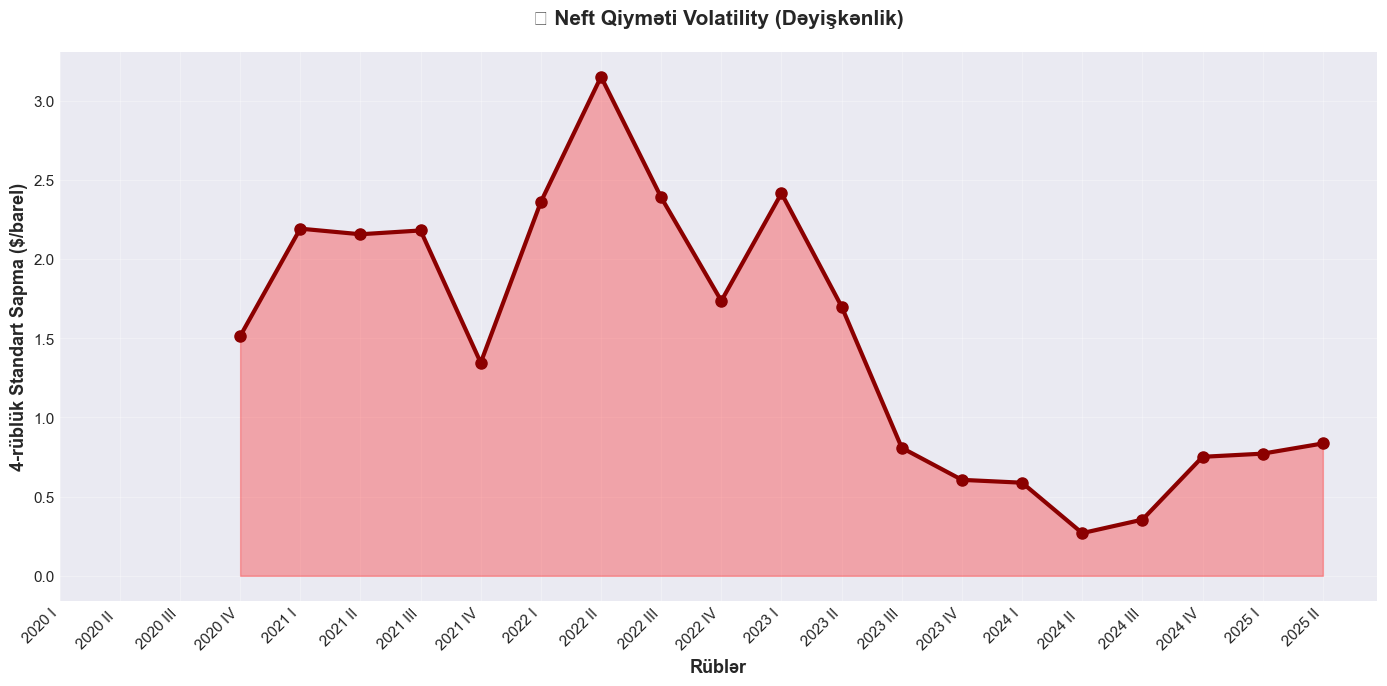


📉 VOLATİLİTY ANALİZİ:
   Ortalama volatility: $1.48
   Maksimum volatility: $3.15
   Volatility indeksi: 0.267


In [16]:
# Neft Volatility
rolling_std = oil_data.rolling(window=4).std()

plt.figure(figsize=(14, 7))
plt.plot(range(len(rolling_std)), rolling_std, 'darkred', linewidth=3, marker='o', markersize=8)
plt.fill_between(range(len(rolling_std)), rolling_std, alpha=0.3, color='red')
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('4-rüblük Standart Sapma ($/barel)', fontsize=13, fontweight='bold')
plt.title('📉 Neft Qiyməti Volatility (Dəyişkənlik)', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters_oil)), quarters_oil, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📉 VOLATİLİTY ANALİZİ:")
print(f"   Ortalama volatility: ${rolling_std.mean():.2f}")
print(f"   Maksimum volatility: ${rolling_std.max():.2f}")
print(f"   Volatility indeksi: {(oil_data.std()/oil_data.mean()):.3f}")

#### 3.2.5 Neft Qiyməti Ümumi Təhlil və Nəticələr

In [17]:
# Neft Detallı Təhlil
print("="*100)
print("🛢️ NEFT QİYMƏTİ ÜMUMI TƏHLİL VƏ NƏTİCƏLƏR")
print("="*100)
print(f"\n📈 ƏSAS STATİSTİKALAR:")
print(f"   Müşahidə sayı:        {len(oil_data)}")
print(f"   Ortalama qiymət:      ${oil_data.mean():.2f}/barel")
print(f"   Median qiymət:        ${oil_data.median():.2f}/barel")
print(f"   Standart Sapma:       ${oil_data.std():.2f}")
print(f"   Dəyişkənlik (CV):     {(oil_data.std()/oil_data.mean()*100):.1f}%")

print(f"\n📊 QİYMƏT DİAPAZONU:")
print(f"   Minimum:              ${oil_data.min():.2f}/barel (2020 pandemiya)")
print(f"   Maksimum:             ${oil_data.max():.2f}/barel")
print(f"   Aralıq:               ${oil_data.max() - oil_data.min():.2f}")

print(f"\n🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:")
oil_loan_corr = correlations['Oil_Price']
print(f"   Korrelyasiya:         {oil_loan_corr:+.3f}")
print(f"   Təsir gücü:           ~{abs(oil_loan_corr)*100:.1f}%")
print(f"   Sıra:                 2-ci ən güclü prediktor")

print(f"\n💡 STRATEJİ NƏTİCƏ:")
current_price = oil_data.iloc[-1]
if current_price > 80:
    print(f"   ✅ Neft qiyməti yüksək zonadadır (${current_price:.0f}) - əlverişli mühit")
    print(f"   📈 Kredit satışlarını artırmaq üçün uyğun dövrdür")
elif current_price > 60:
    print(f"   🟡 Neft qiyməti orta zonadadır (${current_price:.0f}) - sabit mühit")
    print(f"   ⚖️ Balanslaşdırılmış kredit strategiyası tətbiq edin")
else:
    print(f"   ⚠️ Neft qiyməti aşağı zonadadır (${current_price:.0f}) - ehtiyatlı olun")
    print(f"   🛡️ Risk idarəetməsini gücləndirin")

if (oil_data.std()/oil_data.mean()) > 0.3:
    print(f"   ⚠️ Yüksək volatility - qiymət dəyişkənliyi riskini nəzərə alın")
else:
    print(f"   ✅ Orta volatility - qiymətlər nisbətən sabitdir")

print("="*100)

🛢️ NEFT QİYMƏTİ ÜMUMI TƏHLİL VƏ NƏTİCƏLƏR

📈 ƏSAS STATİSTİKALAR:
   Müşahidə sayı:        22
   Ortalama qiymət:      $12.74/barel
   Median qiymət:        $13.42/barel
   Standart Sapma:       $3.40
   Dəyişkənlik (CV):     26.7%

📊 QİYMƏT DİAPAZONU:
   Minimum:              $4.99/barel (2020 pandemiya)
   Maksimum:             $19.30/barel
   Aralıq:               $14.31

🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:
   Korrelyasiya:         +0.764
   Təsir gücü:           ~76.4%
   Sıra:                 2-ci ən güclü prediktor

💡 STRATEJİ NƏTİCƏ:
   ⚠️ Neft qiyməti aşağı zonadadır ($12) - ehtiyatlı olun
   🛡️ Risk idarəetməsini gücləndirin
   ✅ Orta volatility - qiymətlər nisbətən sabitdir


### 3.3 ÜDM və Neft Qiymətinin Birgə Təsiri

**İki əsas amil birlikdə necə işləyir?**

Bu bölümdə ÜDM və neft qiymətinin kredit satışlarına **birgə təsirini** araşdırırıq.

#### 3.3.1 Normallaşdırılmış Trend Müqayisəsi

**İzahat:** Hər 3 göstərici (ÜDM, Neft, Kredit) eyni miqyasa gətirilir (z-score). Bu, onların hərəkətlərini müqayisə etməyə imkan verir.

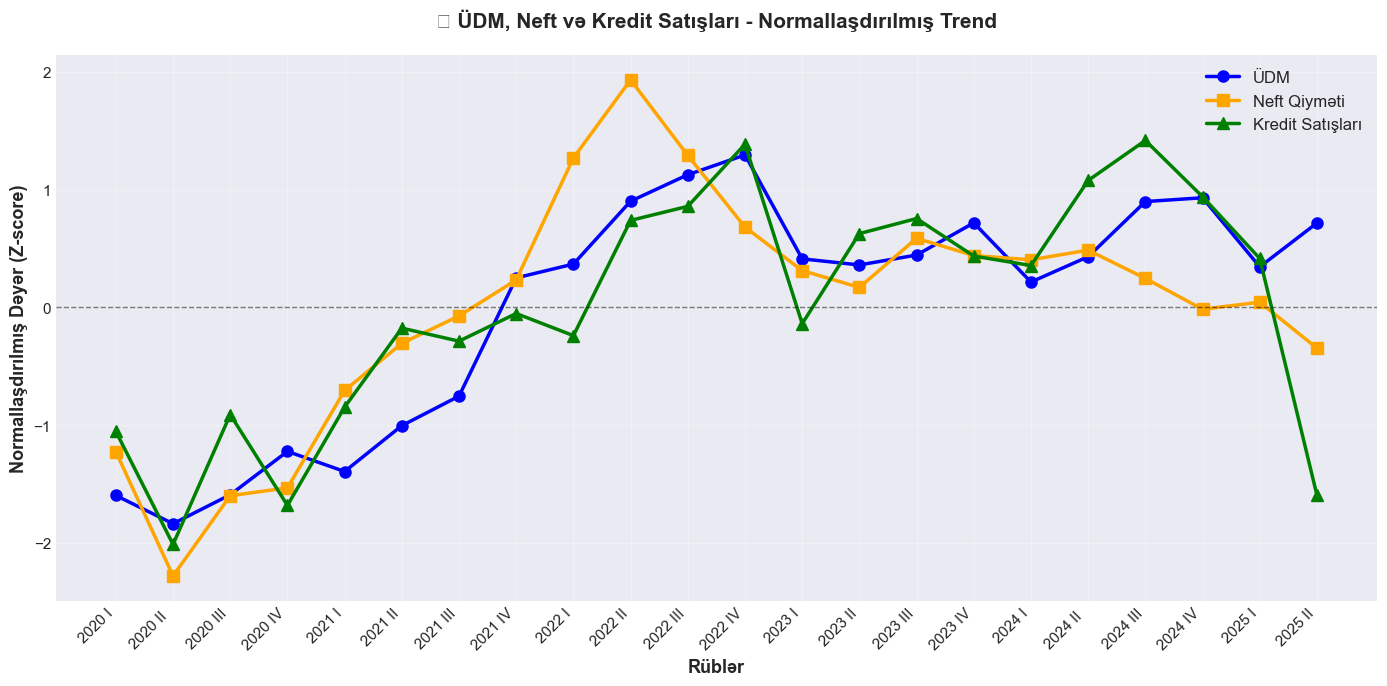


📊 NORMALLAŞDIRILMIŞ TREND ANALİZİ:
   Z-score 0-dan yuxarı = ortalamanın üstündə
   Z-score 0-dan aşağı = ortalamanın altında

💡 MÜŞAHIDƏ: Hər 3 göstəricinin eyni istiqamətdə hərəkət etdiyi görünür


In [18]:
# Normallaşdırılmış Trend
gdp_norm = (numeric_df['GDP'] - numeric_df['GDP'].mean()) / numeric_df['GDP'].std()
oil_norm = (numeric_df['Oil_Price'] - numeric_df['Oil_Price'].mean()) / numeric_df['Oil_Price'].std()
loans_norm = (numeric_df['Nağd_pul_kredit_satışı'] - numeric_df['Nağd_pul_kredit_satışı'].mean()) / numeric_df['Nağd_pul_kredit_satışı'].std()

# Get quarter labels for x-axis
valid_idx = gdp_norm.dropna().index.intersection(oil_norm.dropna().index).intersection(loans_norm.dropna().index)
quarters_combined = df.loc[valid_idx, 'Rüblər'].values

plt.figure(figsize=(14, 7))
plt.plot(range(len(valid_idx)), gdp_norm.loc[valid_idx], 'b-', linewidth=2.5, marker='o', label='ÜDM', markersize=8)
plt.plot(range(len(valid_idx)), oil_norm.loc[valid_idx], 'orange', linewidth=2.5, marker='s', label='Neft Qiyməti', markersize=8)
plt.plot(range(len(valid_idx)), loans_norm.loc[valid_idx], 'green', linewidth=2.5, marker='^', label='Kredit Satışları', markersize=8)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Rüblər', fontsize=13, fontweight='bold')
plt.ylabel('Normallaşdırılmış Dəyər (Z-score)', fontsize=13, fontweight='bold')
plt.title('📊 ÜDM, Neft və Kredit Satışları - Normallaşdırılmış Trend', fontsize=15, fontweight='bold', pad=20)
plt.xticks(range(len(quarters_combined)), quarters_combined, rotation=45, ha='right')
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📊 NORMALLAŞDIRILMIŞ TREND ANALİZİ:")
print("   Z-score 0-dan yuxarı = ortalamanın üstündə")
print("   Z-score 0-dan aşağı = ortalamanın altında")
print("\n💡 MÜŞAHIDƏ: Hər 3 göstəricinin eyni istiqamətdə hərəkət etdiyi görünür")

#### 3.3.2 3D Əlaqə: ÜDM × Neft × Kredit

**İzahat:** 3 dəyişən arasındakı əlaqəni eyni vaxtda görmək üçün 3D scatter plot.

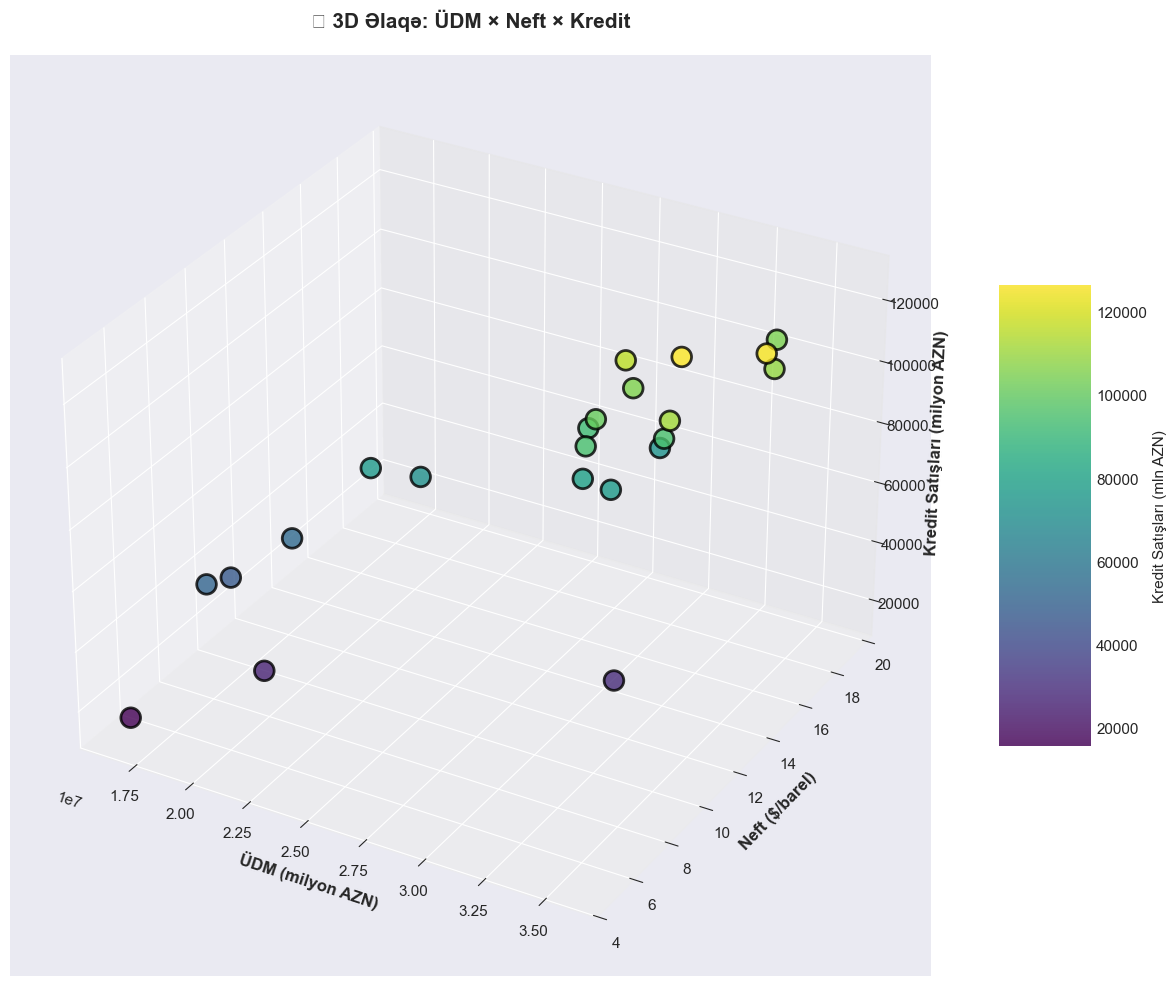


🔮 3D VİZUALİZASİYA:
   Rəng intensivliyi kredit satışlarının həcmini göstərir
   Nöqtələrin yeri ÜDM və neft qiymətinə görə dəyişir


In [19]:
# 3D Scatter Plot

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

x_data = numeric_df['GDP'].dropna()
y_data = numeric_df['Oil_Price'].dropna() * 100  # $/barel
z_data = numeric_df['Nağd_pul_kredit_satışı'].dropna()

# Uyğun indeksləri götür
valid_idx = x_data.index.intersection(y_data.index).intersection(z_data.index)
x_plot = x_data.loc[valid_idx]
y_plot = y_data.loc[valid_idx]
z_plot = z_data.loc[valid_idx]

scatter = ax.scatter(x_plot, y_plot, z_plot, c=z_plot, cmap='viridis', s=200, 
                       edgecolors='black', linewidth=2, alpha=0.8)
ax.set_xlabel('ÜDM (milyon AZN)', fontsize=12, fontweight='bold')
ax.set_ylabel('Neft ($/barel)', fontsize=12, fontweight='bold')
ax.set_zlabel('Kredit Satışları (milyon AZN)', fontsize=12, fontweight='bold')
ax.set_title('🔮 3D Əlaqə: ÜDM × Neft × Kredit', fontsize=15, fontweight='bold', pad=20)
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5, label='Kredit Satışları (mln AZN)')
plt.tight_layout()
plt.show()

print("\n🔮 3D VİZUALİZASİYA:")
print("   Rəng intensivliyi kredit satışlarının həcmini göstərir")
print("   Nöqtələrin yeri ÜDM və neft qiymətinə görə dəyişir")

#### 3.3.3 ÜDM və Neft Birgə Təsir Təhlili

**Məqsəd:** ÜDM və Neft qiymətinin kredit satışlarına birgə təsirini qiymətləndirmək.

In [20]:
# ÜDM və Neft Birgə Təsir Analizi
import numpy as np

print("="*100)
print(" "*30 + "🔍 ÜDM VƏ NEFT BİRGƏ TƏSİR TƏHLİLİ")
print("="*100)

# Korrelyasiya təhlili
gdp_corr = numeric_df[['GDP', 'Nağd_pul_kredit_satışı']].corr().iloc[0,1]
oil_corr = numeric_df[['Oil_Price', 'Nağd_pul_kredit_satışı']].corr().iloc[0,1]

print(f"\n📊 Ayrı-ayrılıqda Korrelyasiyalar:")
print(f"   • ÜDM ↔ Kredit Satışları:          {gdp_corr:+.3f}")
print(f"   • Neft Qiyməti ↔ Kredit Satışları: {oil_corr:+.3f}")

# Multiple correlation analysis
from scipy.stats import pearsonr

# Orta və yüksək ÜDM/Neft dövrləri
gdp_median = numeric_df['GDP'].median()
oil_median = numeric_df['Oil_Price'].median()

high_gdp_high_oil = numeric_df[(numeric_df['GDP'] > gdp_median) & (numeric_df['Oil_Price'] > oil_median)]
low_gdp_low_oil = numeric_df[(numeric_df['GDP'] <= gdp_median) & (numeric_df['Oil_Price'] <= oil_median)]

print(f"\n📈 Scenario Təhlili:")
print(f"\n   🟢 Yüksək ÜDM + Yüksək Neft Dövrü:")
if len(high_gdp_high_oil) > 0:
    print(f"      • Müşahidə sayı: {len(high_gdp_high_oil)}")
    print(f"      • Orta kredit satışı: {high_gdp_high_oil['Nağd_pul_kredit_satışı'].mean():,.0f} mln AZN")
    print(f"      • Qiymət: ÇOX ƏLVERİŞLİ - Maksimum artım potensialı")

print(f"\n   🔴 Aşağı ÜDM + Aşağı Neft Dövrü:")
if len(low_gdp_low_oil) > 0:
    print(f"      • Müşahidə sayı: {len(low_gdp_low_oil)}")
    print(f"      • Orta kredit satışı: {low_gdp_low_oil['Nağd_pul_kredit_satışı'].mean():,.0f} mln AZN")
    print(f"      • Qiymət: RİSKLİ - Konservativ strategiya lazımdır")

# Fərq hesabla
if len(high_gdp_high_oil) > 0 and len(low_gdp_low_oil) > 0:
    diff = high_gdp_high_oil['Nağd_pul_kredit_satışı'].mean() - low_gdp_low_oil['Nağd_pul_kredit_satışı'].mean()
    pct_diff = (diff / low_gdp_low_oil['Nağd_pul_kredit_satışı'].mean()) * 100
    print(f"\n💡 Əsas Nəticə:")
    print(f"   • Yüksək ÜDM+Neft dövründə kredit satışları {pct_diff:+.1f}% DAHA YÜKSƏK")
    print(f"   • Bu, makroiqtisadi şəraitin KRİTİK əhəmiyyətini göstərir")

print("\n" + "="*100)


                              🔍 ÜDM VƏ NEFT BİRGƏ TƏSİR TƏHLİLİ

📊 Ayrı-ayrılıqda Korrelyasiyalar:
   • ÜDM ↔ Kredit Satışları:          +0.777
   • Neft Qiyməti ↔ Kredit Satışları: +0.764

📈 Scenario Təhlili:

   🟢 Yüksək ÜDM + Yüksək Neft Dövrü:
      • Müşahidə sayı: 9
      • Orta kredit satışı: 103,124 mln AZN
      • Qiymət: ÇOX ƏLVERİŞLİ - Maksimum artım potensialı

   🔴 Aşağı ÜDM + Aşağı Neft Dövrü:
      • Müşahidə sayı: 9
      • Orta kredit satışı: 59,371 mln AZN
      • Qiymət: RİSKLİ - Konservativ strategiya lazımdır

💡 Əsas Nəticə:
   • Yüksək ÜDM+Neft dövründə kredit satışları +73.7% DAHA YÜKSƏK
   • Bu, makroiqtisadi şəraitin KRİTİK əhəmiyyətini göstərir



## IV. BANK DAXİLİ GÖSTƏRİCİLƏR VƏ RİSK TƏHLİLİ


#### 4.1.1 NPL Trend Analizi


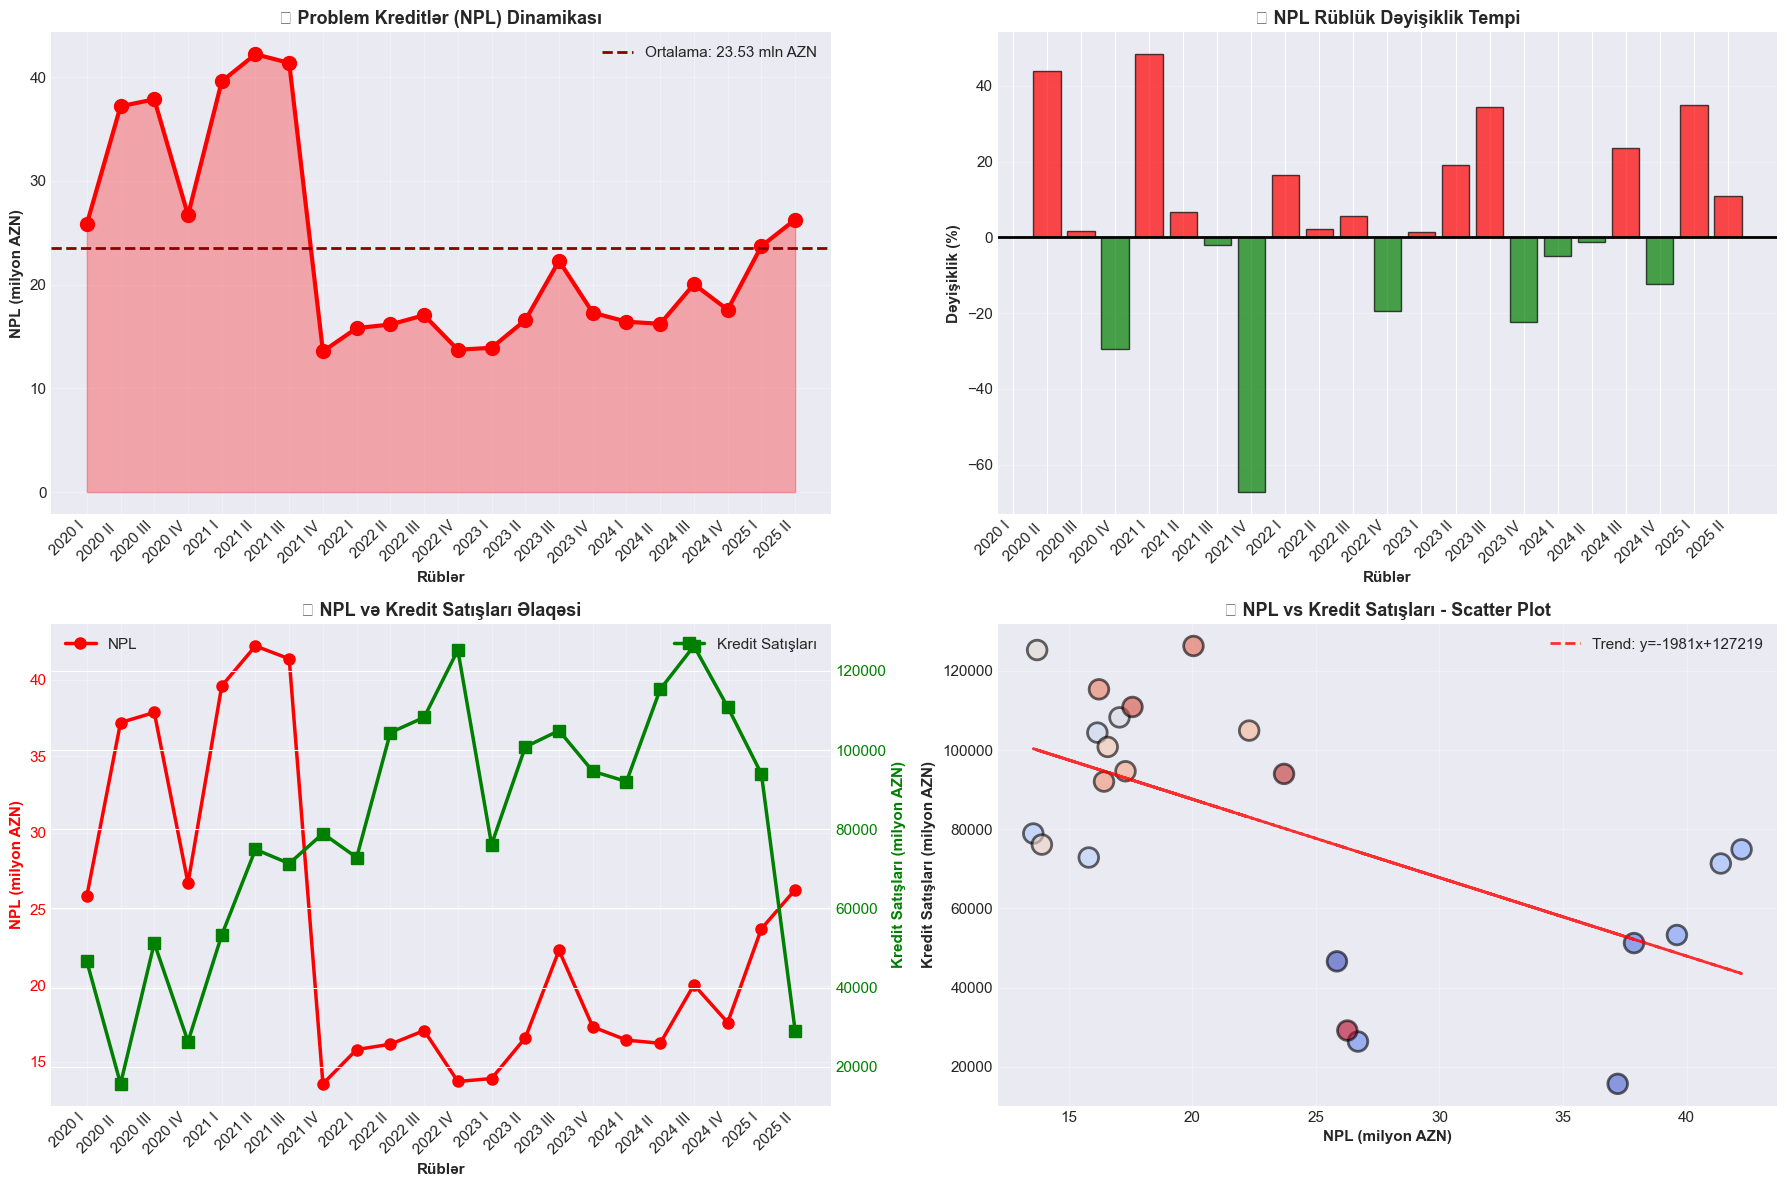


📊 NPL ƏSAS STATİSTİKA
   Müşahidə sayı:        22
   Ortalama NPL:         23.53 milyon AZN
   Median NPL:           18.82 milyon AZN
   Standart Sapma:       9.82 milyon AZN
   Minimum NPL:          13.57 milyon AZN
   Maksimum NPL:         42.22 milyon AZN
   Dəyişkənlik (CV):     41.7%

🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:
   Korrelyasiya:         -0.604
   Əlaqə tipi:           MƏNFİ - Risk Siqnalı!
   Güc:                  Güclü

💡 NƏTİCƏ:
   ⚠️ NPL artdıqda kredit satışları azalır - GÜ CLÜ MƏNFİ əlaqə!
   ⚠️ Problem kreditlər yeni kredit satışlarını ciddi şəkildə əngəlləyir
   📌 STRATEJİ: NPL idarəetməsini gücləndirmək PRİORİTET olmalıdır


In [21]:
# NPL məlumatı
npl_data = numeric_df['NPLs'].dropna()
quarters_npl = df.loc[npl_data.index, 'Rüblər'].values

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. NPL Trend
axes[0, 0].plot(range(len(npl_data)), npl_data, 'r-', linewidth=3, marker='o', markersize=10)
axes[0, 0].fill_between(range(len(npl_data)), npl_data, alpha=0.3, color='red')
axes[0, 0].axhline(y=npl_data.mean(), color='darkred', linestyle='--', linewidth=2, 
                    label=f'Ortalama: {npl_data.mean():.2f} mln AZN')
axes[0, 0].set_xlabel('Rüblər', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('NPL (milyon AZN)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('📉 Problem Kreditlər (NPL) Dinamikası', fontsize=13, fontweight='bold')
axes[0, 0].set_xticks(range(len(quarters_npl)))
axes[0, 0].set_xticklabels(quarters_npl, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. NPL Artım Tempi
npl_growth = npl_data.pct_change() * 100
colors = ['red' if x > 0 else 'green' for x in npl_growth]
axes[0, 1].bar(range(len(npl_growth)), npl_growth, color=colors, alpha=0.7, edgecolor='black')
axes[0, 1].axhline(y=0, color='black', linestyle='-', linewidth=2)
axes[0, 1].set_xlabel('Rüblər', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Dəyişiklik (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('📊 NPL Rüblük Dəyişiklik Tempi', fontsize=13, fontweight='bold')
axes[0, 1].set_xticks(range(len(quarters_npl)))
axes[0, 1].set_xticklabels(quarters_npl, rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. NPL vs Kredit Satışları
loan_data = numeric_df['Nağd_pul_kredit_satışı'].dropna()
valid_idx_npl = npl_data.index.intersection(loan_data.index)

ax3 = axes[1, 0]
ax3_twin = ax3.twinx()

ax3.plot(range(len(valid_idx_npl)), npl_data.loc[valid_idx_npl], 'r-', 
         linewidth=2.5, marker='o', markersize=8, label='NPL')
ax3_twin.plot(range(len(valid_idx_npl)), loan_data.loc[valid_idx_npl], 'g-', 
              linewidth=2.5, marker='s', markersize=8, label='Kredit Satışları')

ax3.set_xlabel('Rüblər', fontsize=11, fontweight='bold')
ax3.set_ylabel('NPL (milyon AZN)', fontsize=11, fontweight='bold', color='red')
ax3_twin.set_ylabel('Kredit Satışları (milyon AZN)', fontsize=11, fontweight='bold', color='green')
ax3.set_title('🔄 NPL və Kredit Satışları Əlaqəsi', fontsize=13, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='red')
ax3_twin.tick_params(axis='y', labelcolor='green')
ax3.set_xticks(range(len(valid_idx_npl)))
quarters_valid = df.loc[valid_idx_npl, 'Rüblər'].values
ax3.set_xticklabels(quarters_valid, rotation=45, ha='right')
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

# 4. NPL Scatter vs Loans
axes[1, 1].scatter(npl_data.loc[valid_idx_npl], loan_data.loc[valid_idx_npl], 
                   s=200, alpha=0.6, edgecolors='black', linewidth=2, c=range(len(valid_idx_npl)), 
                   cmap='coolwarm')
# Trend xətti
z = np.polyfit(npl_data.loc[valid_idx_npl], loan_data.loc[valid_idx_npl], 1)
p = np.poly1d(z)
axes[1, 1].plot(npl_data.loc[valid_idx_npl], p(npl_data.loc[valid_idx_npl]), 
                "r--", linewidth=2, alpha=0.8, label=f'Trend: y={z[0]:.0f}x+{z[1]:.0f}')
axes[1, 1].set_xlabel('NPL (milyon AZN)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Kredit Satışları (milyon AZN)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('🎯 NPL vs Kredit Satışları - Scatter Plot', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# NPL Statistika
print("\n" + "="*100)
print("📊 NPL ƏSAS STATİSTİKA")
print("="*100)
print(f"   Müşahidə sayı:        {len(npl_data)}")
print(f"   Ortalama NPL:         {npl_data.mean():.2f} milyon AZN")
print(f"   Median NPL:           {npl_data.median():.2f} milyon AZN")
print(f"   Standart Sapma:       {npl_data.std():.2f} milyon AZN")
print(f"   Minimum NPL:          {npl_data.min():.2f} milyon AZN")
print(f"   Maksimum NPL:         {npl_data.max():.2f} milyon AZN")
print(f"   Dəyişkənlik (CV):     {(npl_data.std()/npl_data.mean()*100):.1f}%")

print(f"\n🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:")
npl_loan_corr = correlations['NPLs']
print(f"   Korrelyasiya:         {npl_loan_corr:+.3f}")
print(f"   Əlaqə tipi:           {'Müsbət' if npl_loan_corr > 0 else 'MƏNFİ - Risk Siqnalı!'}")
print(f"   Güc:                  {'Güclü' if abs(npl_loan_corr) > 0.5 else 'Orta' if abs(npl_loan_corr) > 0.3 else 'Zəif'}")

print(f"\n💡 NƏTİCƏ:")
if npl_loan_corr < -0.5:
    print(f"   ⚠️ NPL artdıqda kredit satışları azalır - GÜ CLÜ MƏNFİ əlaqə!")
    print(f"   ⚠️ Problem kreditlər yeni kredit satışlarını ciddi şəkildə əngəlləyir")
    print(f"   📌 STRATEJİ: NPL idarəetməsini gücləndirmək PRİORİTET olmalıdır")
elif npl_loan_corr < -0.3:
    print(f"   ⚠️ NPL artdıqda kredit satışları azalır - ORTA MƏNFİ əlaqə")
    print(f"   📌 NPL səviyyəsinə nəzarət vacibdir")
else:
    print(f"   ✅ NPL-in kredit satışlarına təsiri zəifdir")

print("="*100)

### 4.2 Bank Performans Göstəriciləri (ROE, ROA, NIM)

**Əsas Bank Performans Göstəriciləri:**

1. **ROE (Return on Equity)** - Kapital Gəliriliyi
   - Səhmdarların investisiyasından neçə faiz qazanc əldə edilir
   - Yüksək ROE = Effektiv menecment

2. **ROA (Return on Assets)** - Aktiv Gəliriliyi  
   - Hər 1 manat aktiv üçün neçə qopik mənfəət
   - Bank aktivlərinin nə qədər effektiv istifadə olunduğunu göstərir

3. **NIM (Net Interest Margin)** - Xalis Faiz Marjası
   - Faiz gəliri ilə faiz xərci arasındakı fərq
   - Bankın əsas fəaliyyətindən əldə etdiyi mənfəət

#### 4.2.1 Bank Performans Göstəriciləri - Müqayisəli Analiz


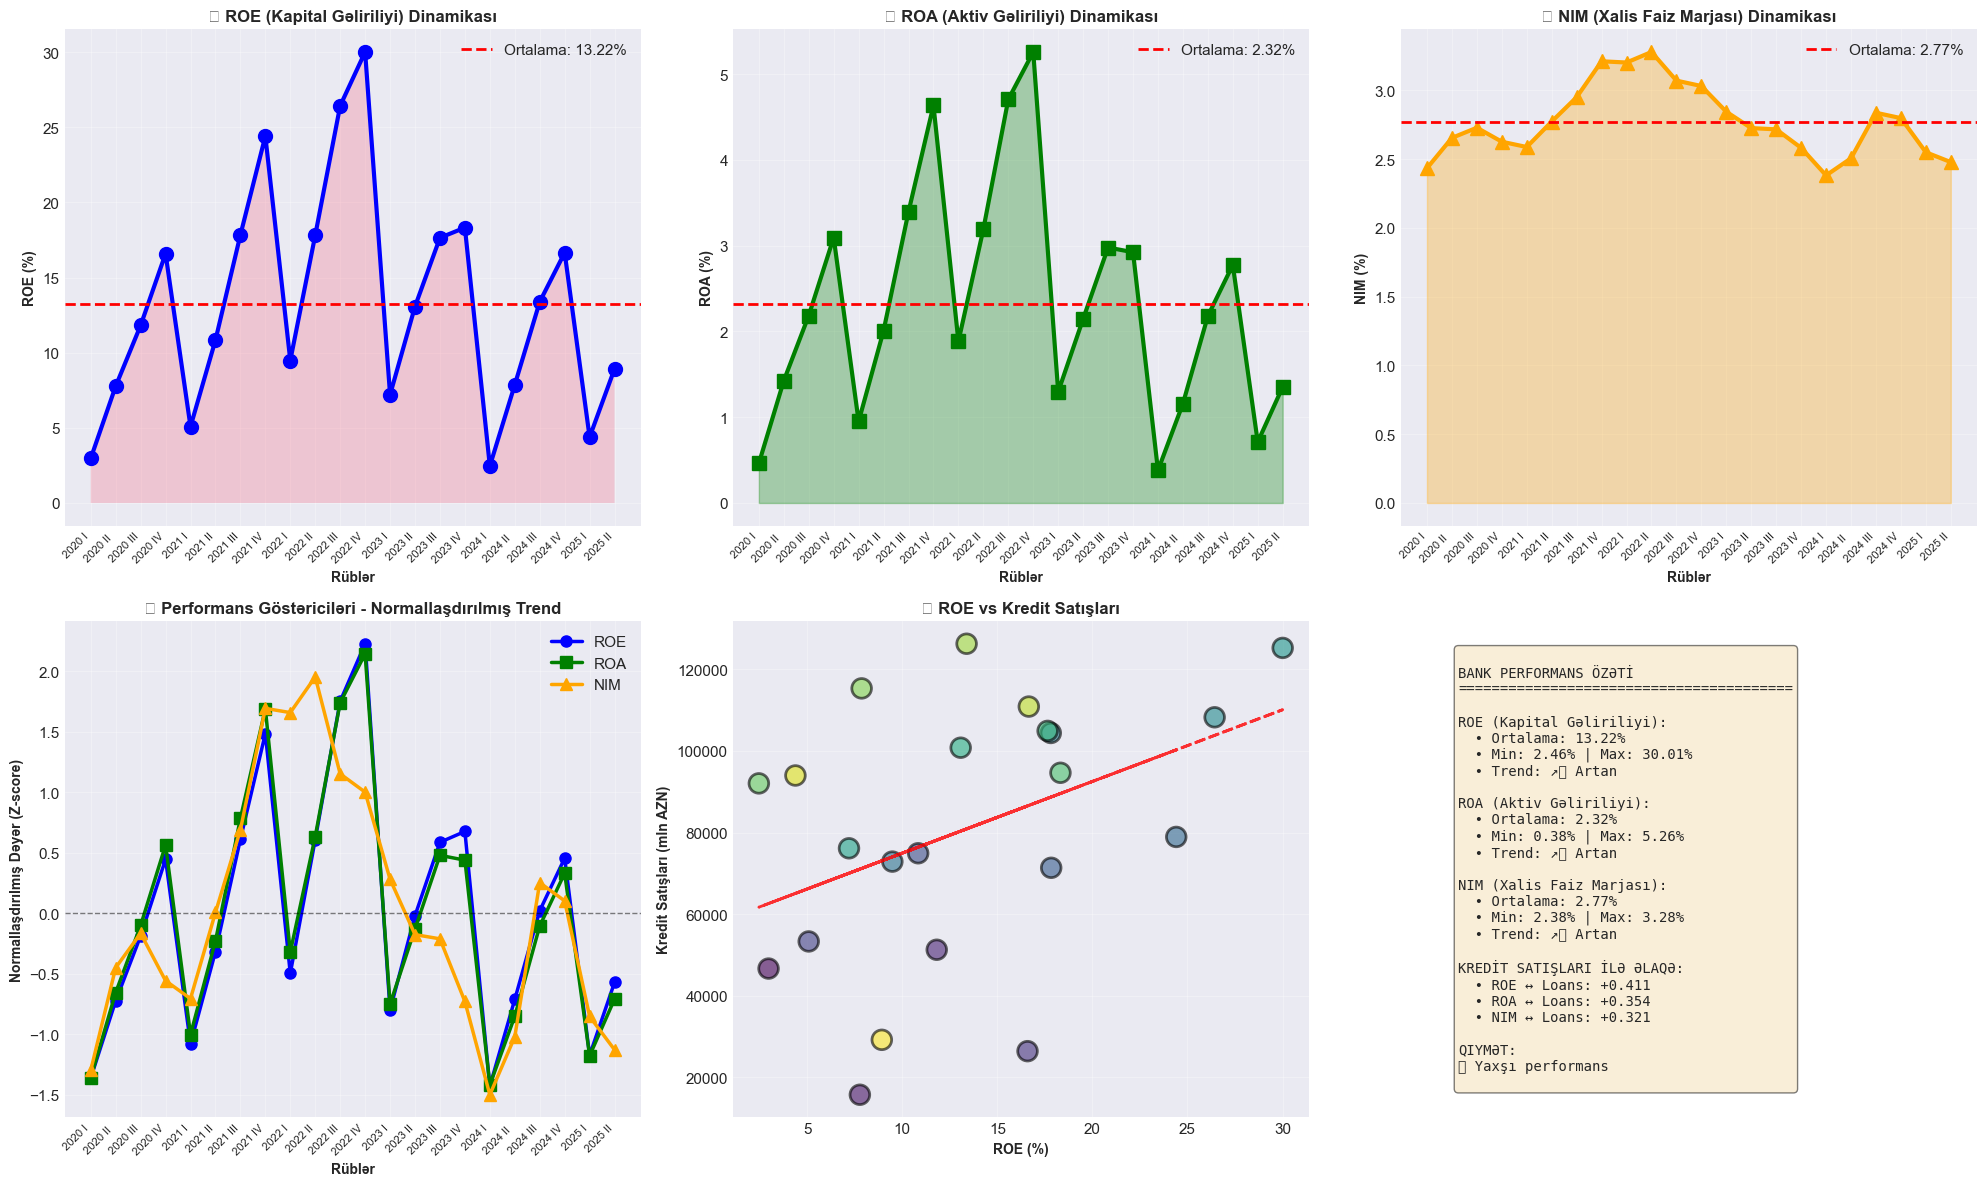


💼 BANK PERFORMANS GÖSTƏRİCİLƏRİ - DETAL ANALİZ

📊 ROE (Return on Equity - Kapital Gəliriliyi):
   Ortalama:         13.22%
   Hal-hazırda:      8.92%
   Benchmark:        ✅ Yaxşı (>12%)

📊 ROA (Return on Assets - Aktiv Gəliriliyi):
   Ortalama:         2.32%
   Hal-hazırda:      1.35%
   Benchmark:        ✅ Yaxşı (>1.5%)

📊 NIM (Net Interest Margin - Xalis Faiz Marjası):
   Ortalama:         2.77%
   Hal-hazırda:      2.48%
   Benchmark:        ⚠️ Aşağı (<3%)

🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:
   ROE əlaqəsi:      +0.411 (Müsbət)
   ROA əlaqəsi:      +0.354 (Müsbət)
   NIM əlaqəsi:      +0.321 (Müsbət)

💡 STRATEJİ NƏTİCƏ:
   ✅ Bank performansı yaxşıdır
   ✅ Gəlirlilik səviyyəsi qənaətbəxşdir
   📈 Kredit satışlarını artırmaq üçün yaxşı zəmin var


In [22]:
# Məlumatı hazırla (faiz formatında)
roe_data = numeric_df['ROE'].dropna() * 100
roa_data = numeric_df['ROA'].dropna() * 100
nim_data = numeric_df['Net_Interest_Margin'].dropna() * 100

# Valid indekslər
valid_perf_idx = roe_data.index.intersection(roa_data.index).intersection(nim_data.index)
quarters_perf = df.loc[valid_perf_idx, 'Rüblər'].values

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. ROE Trend
axes[0, 0].plot(range(len(valid_perf_idx)), roe_data.loc[valid_perf_idx], 
                'b-', linewidth=3, marker='o', markersize=10)
axes[0, 0].fill_between(range(len(valid_perf_idx)), roe_data.loc[valid_perf_idx], alpha=0.3)
axes[0, 0].axhline(y=roe_data.loc[valid_perf_idx].mean(), color='red', linestyle='--', linewidth=2,
                    label=f'Ortalama: {roe_data.loc[valid_perf_idx].mean():.2f}%')
axes[0, 0].set_xlabel('Rüblər', fontsize=10, fontweight='bold')
axes[0, 0].set_ylabel('ROE (%)', fontsize=10, fontweight='bold')
axes[0, 0].set_title('💰 ROE (Kapital Gəliriliyi) Dinamikası', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(range(len(quarters_perf)))
axes[0, 0].set_xticklabels(quarters_perf, rotation=45, ha='right', fontsize=8)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. ROA Trend
axes[0, 1].plot(range(len(valid_perf_idx)), roa_data.loc[valid_perf_idx], 
                'g-', linewidth=3, marker='s', markersize=10)
axes[0, 1].fill_between(range(len(valid_perf_idx)), roa_data.loc[valid_perf_idx], alpha=0.3, color='green')
axes[0, 1].axhline(y=roa_data.loc[valid_perf_idx].mean(), color='red', linestyle='--', linewidth=2,
                    label=f'Ortalama: {roa_data.loc[valid_perf_idx].mean():.2f}%')
axes[0, 1].set_xlabel('Rüblər', fontsize=10, fontweight='bold')
axes[0, 1].set_ylabel('ROA (%)', fontsize=10, fontweight='bold')
axes[0, 1].set_title('📊 ROA (Aktiv Gəliriliyi) Dinamikası', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(range(len(quarters_perf)))
axes[0, 1].set_xticklabels(quarters_perf, rotation=45, ha='right', fontsize=8)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. NIM Trend
axes[0, 2].plot(range(len(valid_perf_idx)), nim_data.loc[valid_perf_idx], 
                'orange', linewidth=3, marker='^', markersize=10)
axes[0, 2].fill_between(range(len(valid_perf_idx)), nim_data.loc[valid_perf_idx], alpha=0.3, color='orange')
axes[0, 2].axhline(y=nim_data.loc[valid_perf_idx].mean(), color='red', linestyle='--', linewidth=2,
                    label=f'Ortalama: {nim_data.loc[valid_perf_idx].mean():.2f}%')
axes[0, 2].set_xlabel('Rüblər', fontsize=10, fontweight='bold')
axes[0, 2].set_ylabel('NIM (%)', fontsize=10, fontweight='bold')
axes[0, 2].set_title('💵 NIM (Xalis Faiz Marjası) Dinamikası', fontsize=12, fontweight='bold')
axes[0, 2].set_xticks(range(len(quarters_perf)))
axes[0, 2].set_xticklabels(quarters_perf, rotation=45, ha='right', fontsize=8)
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. Üç göstərici birlikdə (normallaşdırılmış)
roe_norm = (roe_data.loc[valid_perf_idx] - roe_data.loc[valid_perf_idx].mean()) / roe_data.loc[valid_perf_idx].std()
roa_norm = (roa_data.loc[valid_perf_idx] - roa_data.loc[valid_perf_idx].mean()) / roa_data.loc[valid_perf_idx].std()
nim_norm = (nim_data.loc[valid_perf_idx] - nim_data.loc[valid_perf_idx].mean()) / nim_data.loc[valid_perf_idx].std()

axes[1, 0].plot(range(len(valid_perf_idx)), roe_norm, 'b-', linewidth=2.5, marker='o', label='ROE', markersize=8)
axes[1, 0].plot(range(len(valid_perf_idx)), roa_norm, 'g-', linewidth=2.5, marker='s', label='ROA', markersize=8)
axes[1, 0].plot(range(len(valid_perf_idx)), nim_norm, 'orange', linewidth=2.5, marker='^', label='NIM', markersize=8)
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 0].set_xlabel('Rüblər', fontsize=10, fontweight='bold')
axes[1, 0].set_ylabel('Normallaşdırılmış Dəyər (Z-score)', fontsize=10, fontweight='bold')
axes[1, 0].set_title('📈 Performans Göstəriciləri - Normallaşdırılmış Trend', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(range(len(quarters_perf)))
axes[1, 0].set_xticklabels(quarters_perf, rotation=45, ha='right', fontsize=8)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. ROE vs Kredit Satışları
loan_perf = numeric_df['Nağd_pul_kredit_satışı'].dropna()
valid_roe_loan = roe_data.index.intersection(loan_perf.index)
axes[1, 1].scatter(roe_data.loc[valid_roe_loan], loan_perf.loc[valid_roe_loan], 
                   s=200, alpha=0.6, edgecolors='black', linewidth=2, c=range(len(valid_roe_loan)), cmap='viridis')
z = np.polyfit(roe_data.loc[valid_roe_loan], loan_perf.loc[valid_roe_loan], 1)
p = np.poly1d(z)
axes[1, 1].plot(roe_data.loc[valid_roe_loan], p(roe_data.loc[valid_roe_loan]), 
                "r--", linewidth=2, alpha=0.8)
axes[1, 1].set_xlabel('ROE (%)', fontsize=10, fontweight='bold')
axes[1, 1].set_ylabel('Kredit Satışları (mln AZN)', fontsize=10, fontweight='bold')
axes[1, 1].set_title('🎯 ROE vs Kredit Satışları', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# 6. Performans özət tablosu
axes[1, 2].axis('off')
summary_text = f"""
BANK PERFORMANS ÖZƏTİ
{'='*40}

ROE (Kapital Gəliriliyi):
  • Ortalama: {roe_data.mean():.2f}%
  • Min: {roe_data.min():.2f}% | Max: {roe_data.max():.2f}%
  • Trend: {'↗️ Artan' if roe_data.iloc[-1] > roe_data.iloc[0] else '↘️ Azalan'}

ROA (Aktiv Gəliriliyi):
  • Ortalama: {roa_data.mean():.2f}%
  • Min: {roa_data.min():.2f}% | Max: {roa_data.max():.2f}%
  • Trend: {'↗️ Artan' if roa_data.iloc[-1] > roa_data.iloc[0] else '↘️ Azalan'}

NIM (Xalis Faiz Marjası):
  • Ortalama: {nim_data.mean():.2f}%
  • Min: {nim_data.min():.2f}% | Max: {nim_data.max():.2f}%
  • Trend: {'↗️ Artan' if nim_data.iloc[-1] > nim_data.iloc[0] else '↘️ Azalan'}

KREDİT SATIŞLARI İLƏ ƏLAQƏ:
  • ROE ↔ Loans: {correlations['ROE']:+.3f}
  • ROA ↔ Loans: {correlations['ROA']:+.3f}
  • NIM ↔ Loans: {correlations['Net_Interest_Margin']:+.3f}

QIYMƏT:
{'✅ Yaxşı performans' if roe_data.mean() > 12 and roa_data.mean() > 1.5 else '⚠️ Performans təkmilləşdirilə bilər'}
"""
axes[1, 2].text(0.1, 0.5, summary_text, fontsize=10, family='monospace',
                verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "="*100)
print("💼 BANK PERFORMANS GÖSTƏRİCİLƏRİ - DETAL ANALİZ")
print("="*100)

print(f"\n📊 ROE (Return on Equity - Kapital Gəliriliyi):")
print(f"   Ortalama:         {roe_data.mean():.2f}%")
print(f"   Hal-hazırda:      {roe_data.iloc[-1]:.2f}%")
print(f"   Benchmark:        {'✅ Yaxşı (>12%)' if roe_data.mean() > 12 else '⚠️ Aşağı (<12%)'}")

print(f"\n📊 ROA (Return on Assets - Aktiv Gəliriliyi):")
print(f"   Ortalama:         {roa_data.mean():.2f}%")
print(f"   Hal-hazırda:      {roa_data.iloc[-1]:.2f}%")
print(f"   Benchmark:        {'✅ Yaxşı (>1.5%)' if roa_data.mean() > 1.5 else '⚠️ Aşağı (<1.5%)'}")

print(f"\n📊 NIM (Net Interest Margin - Xalis Faiz Marjası):")
print(f"   Ortalama:         {nim_data.mean():.2f}%")
print(f"   Hal-hazırda:      {nim_data.iloc[-1]:.2f}%")
print(f"   Benchmark:        {'✅ Yaxşı (>3%)' if nim_data.mean() > 3 else '⚠️ Aşağı (<3%)'}")

print(f"\n🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:")
print(f"   ROE əlaqəsi:      {correlations['ROE']:+.3f} ({'Müsbət' if correlations['ROE'] > 0 else 'Mənfi'})")
print(f"   ROA əlaqəsi:      {correlations['ROA']:+.3f} ({'Müsbət' if correlations['ROA'] > 0 else 'Mənfi'})")
print(f"   NIM əlaqəsi:      {correlations['Net_Interest_Margin']:+.3f} ({'Müsbət' if correlations['Net_Interest_Margin'] > 0 else 'Mənfi'})")

print(f"\n💡 STRATEJİ NƏTİCƏ:")
if roe_data.mean() > 12 and roa_data.mean() > 1.5:
    print(f"   ✅ Bank performansı yaxşıdır")
    print(f"   ✅ Gəlirlilik səviyyəsi qənaətbəxşdir")
    print(f"   📈 Kredit satışlarını artırmaq üçün yaxşı zəmin var")
else:
    print(f"   ⚠️ Bank performansı təkmilləşdirilə bilər")
    print(f"   📌 Gəlirlilik göstəricilərini yüksəltmək lazımdır")
    print(f"   📌 Xərc idarəetməsi və aktiv keyfiyyətinə fokus")

print("="*100)

### 4.3 Müştəri Bazası Təhlili

**Müştəri sayı niyə vacibdir?**
- Müştəri bazasının genişliyi bank potensialını göstərir
- Çox müştəri = çox kredit satış potensialı
- Müştəri artım dinamikası bazarın genişlənməsini göstərir

#### 4.3.1 Müştəri Bazası Dinamikası və Kredit Satışları ilə Əlaqə


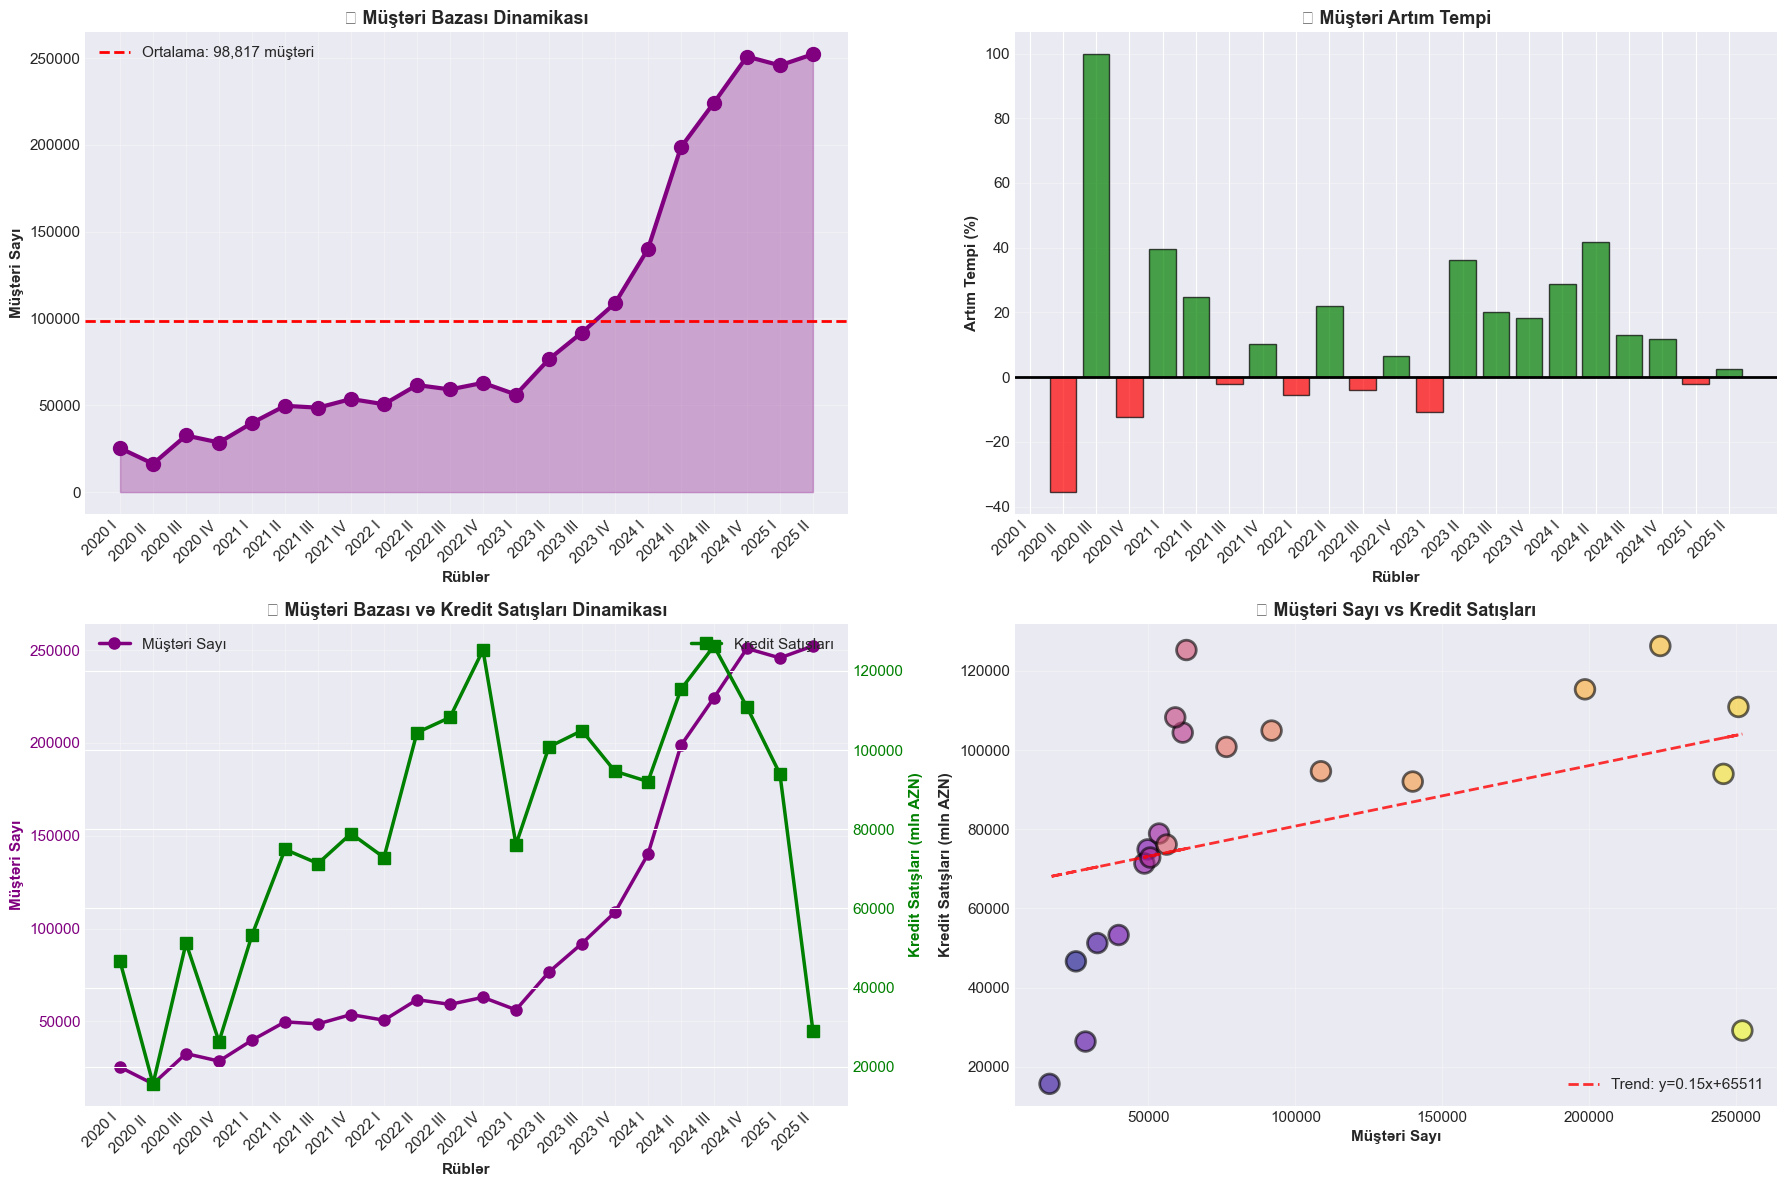


👥 MÜŞTƏRİ BAZASI TƏHLİLİ
   Müşahidə sayı:        22
   Ortalama müştəri:     98,817
   Median müştəri:       60,396
   Minimum:              16,316
   Maksimum:             252,200
   Dəyişkənlik (CV):     81.6%

📈 ARTIM ANALİZİ:
   Ümumi artım:          +896.68%
   Ortalama rüblük artım: +14.41%
   Trend:                ↗️ Genişlənmə

🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:
   Korrelyasiya:         +0.383
   Əlaqə gücü:           Orta

💰 MÜŞTƏRİ BAŞINA ORTALAMA KREDİT:
   Ortalama:             1.16 AZN
   Minimum:              0.12 AZN
   Maksimum:             1.99 AZN

💡 NƏTİCƏ:
   ✅ Müştəri bazası sürətlə genişlənir (+896.7%)
   ✅ Bazar payı artmaqdadır
   ✅ Müştəri artımı kredit satışlarını stimullaşdırır


In [23]:
# Müştəri məlumatı
customer_data = numeric_df['Müştəri_sayı'].dropna()
quarters_cust = df.loc[customer_data.index, 'Rüblər'].values

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Müştəri Sayı Trend
axes[0, 0].plot(range(len(customer_data)), customer_data, 'purple', linewidth=3, marker='o', markersize=10)
axes[0, 0].fill_between(range(len(customer_data)), customer_data, alpha=0.3, color='purple')
axes[0, 0].axhline(y=customer_data.mean(), color='red', linestyle='--', linewidth=2,
                    label=f'Ortalama: {customer_data.mean():,.0f} müştəri')
axes[0, 0].set_xlabel('Rüblər', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Müştəri Sayı', fontsize=11, fontweight='bold')
axes[0, 0].set_title('👥 Müştəri Bazası Dinamikası', fontsize=13, fontweight='bold')
axes[0, 0].set_xticks(range(len(quarters_cust)))
axes[0, 0].set_xticklabels(quarters_cust, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Müştəri Artım Tempi
cust_growth = customer_data.pct_change() * 100
colors = ['green' if x > 0 else 'red' for x in cust_growth]
axes[0, 1].bar(range(len(cust_growth)), cust_growth, color=colors, alpha=0.7, edgecolor='black')
axes[0, 1].axhline(y=0, color='black', linestyle='-', linewidth=2)
axes[0, 1].set_xlabel('Rüblər', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Artım Tempi (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('📈 Müştəri Artım Tempi', fontsize=13, fontweight='bold')
axes[0, 1].set_xticks(range(len(quarters_cust)))
axes[0, 1].set_xticklabels(quarters_cust, rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Müştəri vs Kredit Satışları (iki oxlu)
loan_cust = numeric_df['Nağd_pul_kredit_satışı'].dropna()
valid_cust_loan = customer_data.index.intersection(loan_cust.index)

ax3 = axes[1, 0]
ax3_twin = ax3.twinx()

ax3.plot(range(len(valid_cust_loan)), customer_data.loc[valid_cust_loan], 'purple', 
         linewidth=2.5, marker='o', markersize=8, label='Müştəri Sayı')
ax3_twin.plot(range(len(valid_cust_loan)), loan_cust.loc[valid_cust_loan], 'green', 
              linewidth=2.5, marker='s', markersize=8, label='Kredit Satışları')

ax3.set_xlabel('Rüblər', fontsize=11, fontweight='bold')
ax3.set_ylabel('Müştəri Sayı', fontsize=11, fontweight='bold', color='purple')
ax3_twin.set_ylabel('Kredit Satışları (mln AZN)', fontsize=11, fontweight='bold', color='green')
ax3.set_title('🔄 Müştəri Bazası və Kredit Satışları Dinamikası', fontsize=13, fontweight='bold')
ax3.tick_params(axis='y', labelcolor='purple')
ax3_twin.tick_params(axis='y', labelcolor='green')
ax3.set_xticks(range(len(valid_cust_loan)))
quarters_valid_cust = df.loc[valid_cust_loan, 'Rüblər'].values
ax3.set_xticklabels(quarters_valid_cust, rotation=45, ha='right')
ax3.grid(True, alpha=0.3)
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

# 4. Müştəri vs Kredit Scatter
axes[1, 1].scatter(customer_data.loc[valid_cust_loan], loan_cust.loc[valid_cust_loan], 
                   s=200, alpha=0.6, edgecolors='black', linewidth=2, c=range(len(valid_cust_loan)), 
                   cmap='plasma')
# Trend xətti
z = np.polyfit(customer_data.loc[valid_cust_loan], loan_cust.loc[valid_cust_loan], 1)
p = np.poly1d(z)
axes[1, 1].plot(customer_data.loc[valid_cust_loan], p(customer_data.loc[valid_cust_loan]), 
                "r--", linewidth=2, alpha=0.8, label=f'Trend: y={z[0]:.2f}x+{z[1]:.0f}')
axes[1, 1].set_xlabel('Müştəri Sayı', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Kredit Satışları (mln AZN)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('🎯 Müştəri Sayı vs Kredit Satışları', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Müştəri Statistika
print("\n" + "="*100)
print("👥 MÜŞTƏRİ BAZASI TƏHLİLİ")
print("="*100)
print(f"   Müşahidə sayı:        {len(customer_data)}")
print(f"   Ortalama müştəri:     {customer_data.mean():,.0f}")
print(f"   Median müştəri:       {customer_data.median():,.0f}")
print(f"   Minimum:              {customer_data.min():,.0f}")
print(f"   Maksimum:             {customer_data.max():,.0f}")
print(f"   Dəyişkənlik (CV):     {(customer_data.std()/customer_data.mean()*100):.1f}%")

total_cust_growth = ((customer_data.iloc[-1] / customer_data.iloc[0]) - 1) * 100
print(f"\n📈 ARTIM ANALİZİ:")
print(f"   Ümumi artım:          {total_cust_growth:+.2f}%")
print(f"   Ortalama rüblük artım: {cust_growth.mean():+.2f}%")
print(f"   Trend:                {'↗️ Genişlənmə' if total_cust_growth > 0 else '↘️ Daralma'}")

print(f"\n🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:")
cust_loan_corr = correlations['Müştəri_sayı']
print(f"   Korrelyasiya:         {cust_loan_corr:+.3f}")
print(f"   Əlaqə gücü:           {'Güclü' if abs(cust_loan_corr) > 0.5 else 'Orta' if abs(cust_loan_corr) > 0.3 else 'Zəif'}")

# Müştəri başına ortalama kredit
avg_loan_per_customer = loan_cust.loc[valid_cust_loan] / customer_data.loc[valid_cust_loan]
print(f"\n💰 MÜŞTƏRİ BAŞINA ORTALAMA KREDİT:")
print(f"   Ortalama:             {avg_loan_per_customer.mean():,.2f} AZN")
print(f"   Minimum:              {avg_loan_per_customer.min():,.2f} AZN")
print(f"   Maksimum:             {avg_loan_per_customer.max():,.2f} AZN")

print(f"\n💡 NƏTİCƏ:")
if total_cust_growth > 10:
    print(f"   ✅ Müştəri bazası sürətlə genişlənir (+{total_cust_growth:.1f}%)")
    print(f"   ✅ Bazar payı artmaqdadır")
elif total_cust_growth > 0:
    print(f"   🟡 Müştəri bazası yavaş artır (+{total_cust_growth:.1f}%)")
    print(f"   📌 Müştəri cəlb etmə strategiyasını güclündirmək lazımdır")
else:
    print(f"   ⚠️ Müştəri bazası azalır ({total_cust_growth:.1f}%)")
    print(f"   🚨 Müştəri saxlama və cəlb etmə PRİORİTETdir!")

if cust_loan_corr > 0.3:
    print(f"   ✅ Müştəri artımı kredit satışlarını stimullaşdırır")
else:
    print(f"   ⚠️ Müştəri artımı kredit satışlarına kifayət qədər təsir etmir")
    print(f"   📌 Müştəri başına kredit dərinliyini artırmaq lazımdır")

print("="*100)

## V. ÇOXDƏYİŞƏNLİ ANALİZ (MULTIVARIATE ANALYSIS)


#### 5.1.1 Əsas Dəyişənlər üzrə Scatter Plot Matrisi


<Figure size 1800x1800 with 0 Axes>

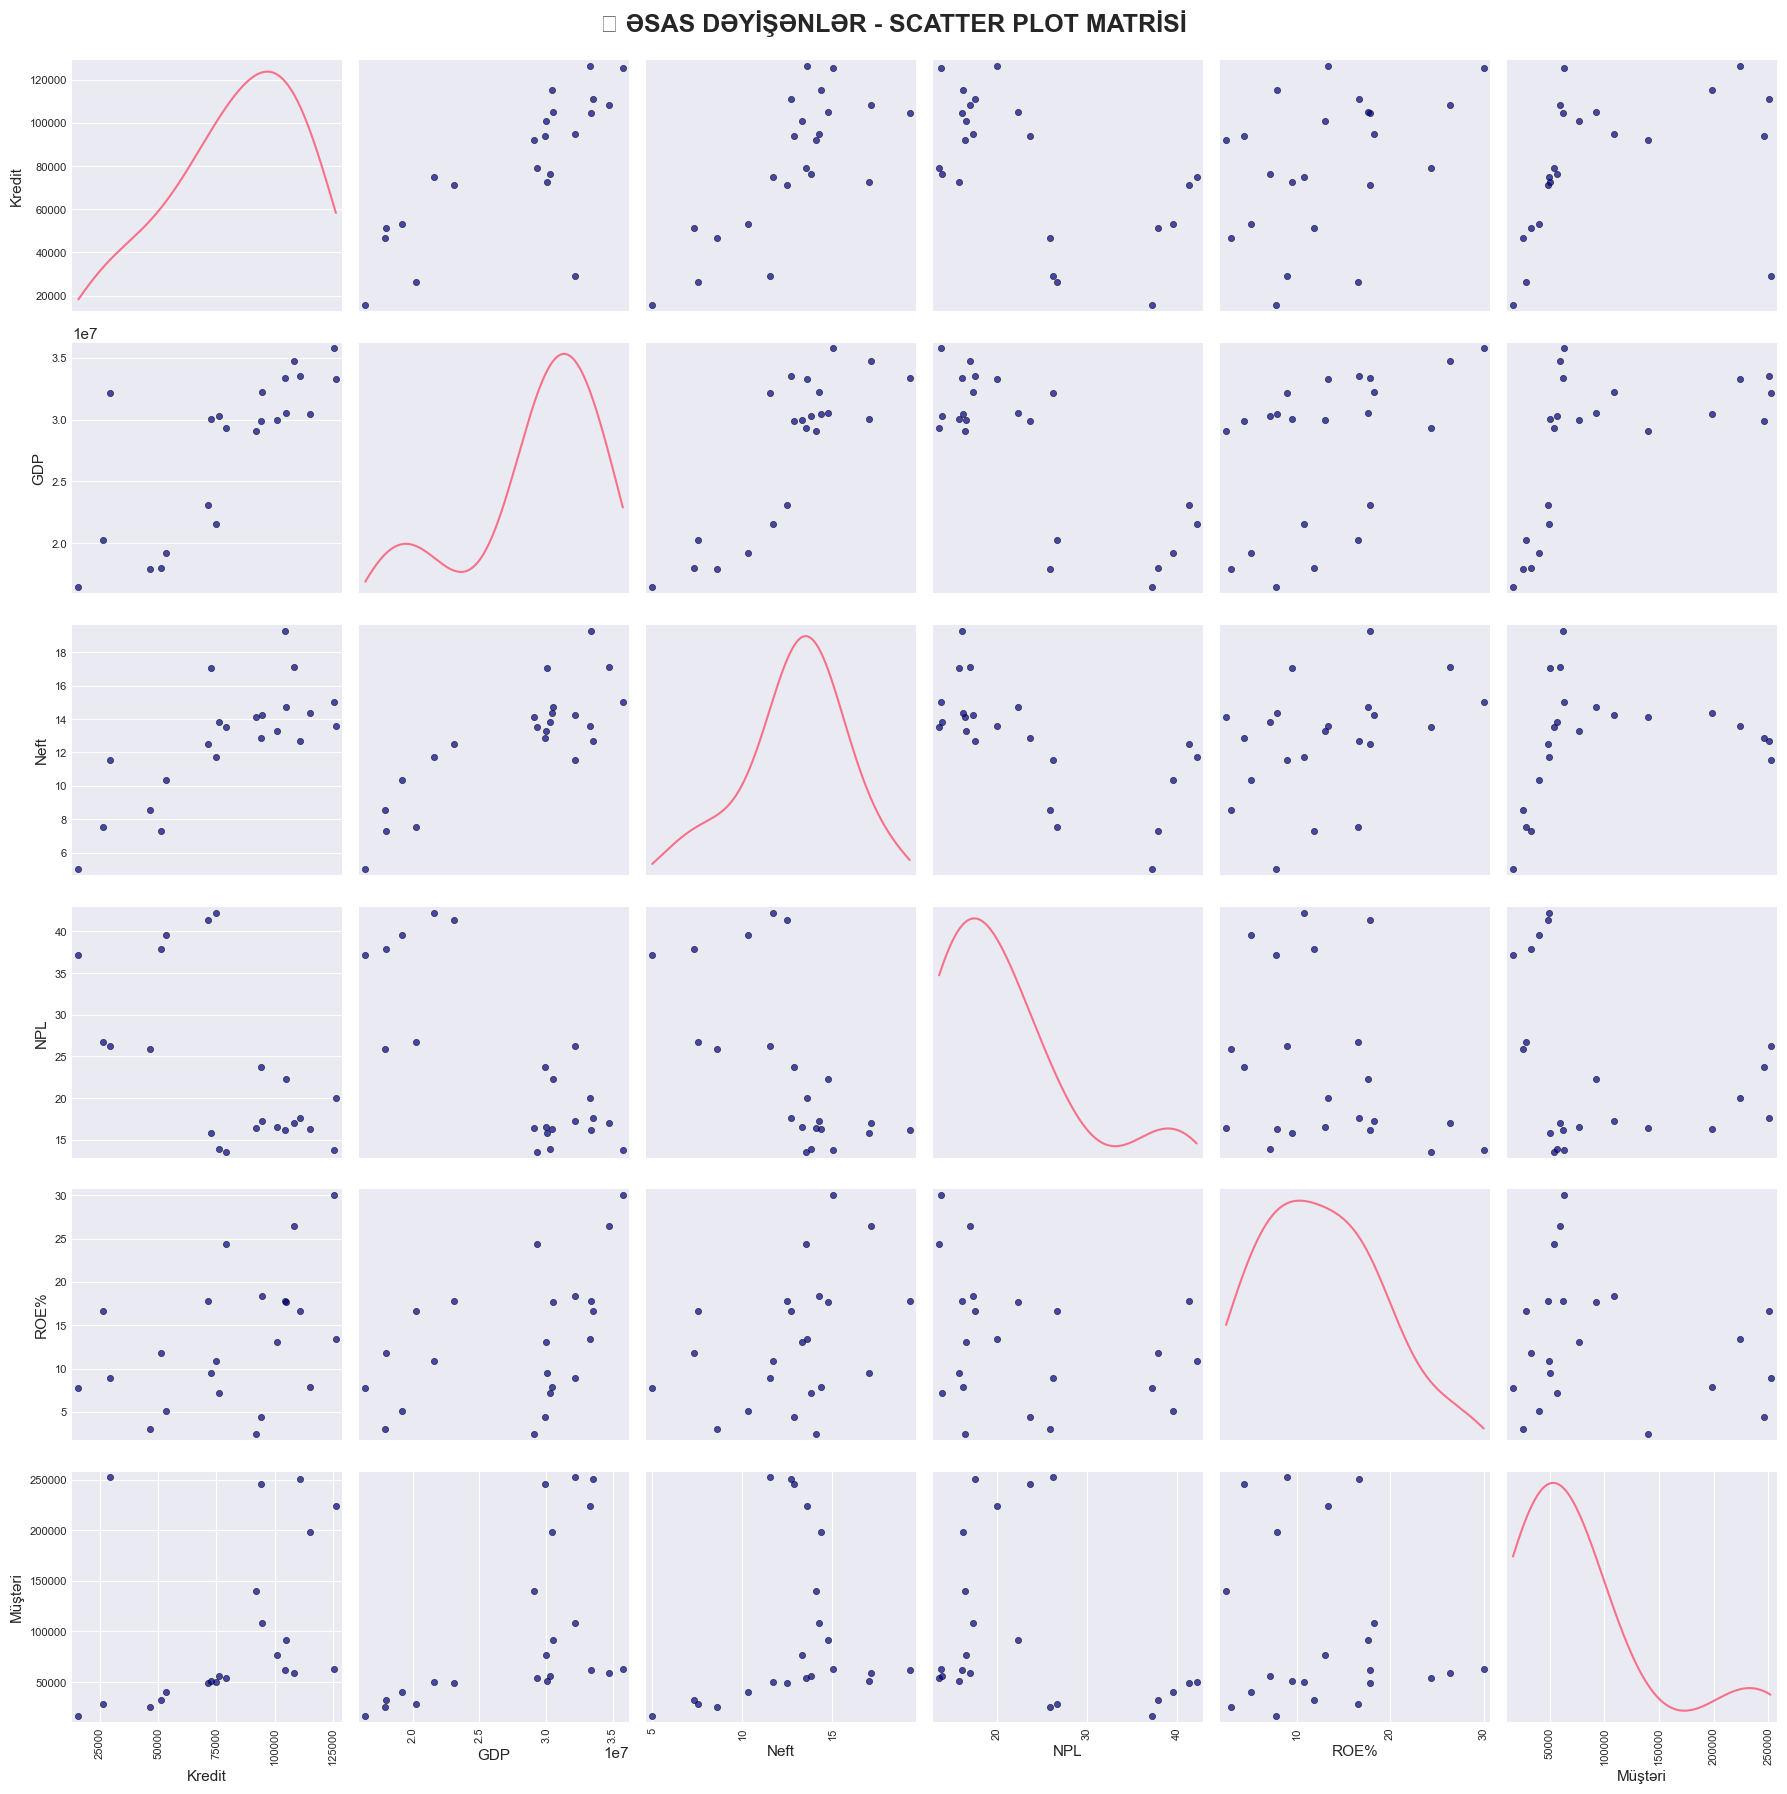


🔍 SCATTER PLOT MATRİSİ - ƏSAS MÜŞAHİDƏLƏR

📊 NƏ GÖRÜRÜK:
   • Diaqonal: Hər dəyişənin paylanması (density plot)
   • Qalan hissələr: Dəyişənlər arası scatter plot

💡 ƏSAS PATTERN-LƏR:
   1. Kredit ↔ GDP:    Güclü müsbət xətti əlaqə
   2. Kredit ↔ Neft:   Güclü müsbət əlaqə
   3. Kredit ↔ NPL:    Mənfi əlaqə (NPL artanda kredit azalır)
   4. GDP ↔ Neft:      Çox güclü müsbət əlaqə (multicollinearity)
   5. Kredit ↔ Müştəri: Müsbət əlaqə (müştəri artanda kredit artar)


In [24]:
# Əsas dəyişənləri seçirik
key_vars = ['Nağd_pul_kredit_satışı', 'GDP', 'Oil_Price', 'NPLs', 'ROE', 'Müştəri_sayı']
scatter_df = numeric_df[key_vars].dropna()

# Oil_Price və ROE-ni faizə çeviririk (göstəriş üçün)
scatter_df_display = scatter_df.copy()
scatter_df_display['Oil_Price'] = scatter_df_display['Oil_Price'] * 100
scatter_df_display['ROE'] = scatter_df_display['ROE'] * 100

# Sütun adlarını yenidən adlandırırıq (daha qısa)
scatter_df_display.columns = ['Kredit', 'GDP', 'Neft', 'NPL', 'ROE%', 'Müştəri']

# Scatter matrix

fig = plt.figure(figsize=(18, 18))
scatter_matrix(scatter_df_display, alpha=0.7, figsize=(18, 18), diagonal='kde', 
               color='darkblue', edgecolors='black', linewidth=0.5, s=80)
plt.suptitle('🔍 ƏSAS DƏYİŞƏNLƏR - SCATTER PLOT MATRİSİ', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n" + "="*100)
print("🔍 SCATTER PLOT MATRİSİ - ƏSAS MÜŞAHİDƏLƏR")
print("="*100)
print("\n📊 NƏ GÖRÜRÜK:")
print("   • Diaqonal: Hər dəyişənin paylanması (density plot)")
print("   • Qalan hissələr: Dəyişənlər arası scatter plot")
print("\n💡 ƏSAS PATTERN-LƏR:")
print("   1. Kredit ↔ GDP:    Güclü müsbət xətti əlaqə")
print("   2. Kredit ↔ Neft:   Güclü müsbət əlaqə")
print("   3. Kredit ↔ NPL:    Mənfi əlaqə (NPL artanda kredit azalır)")
print("   4. GDP ↔ Neft:      Çox güclü müsbət əlaqə (multicollinearity)")
print("   5. Kredit ↔ Müştəri: Müsbət əlaqə (müştəri artanda kredit artar)")
print("="*100)

---
## VI. YEKUN NƏTİCƏLƏR VƏ STRATEJİ TÖVSİYƏLƏR

### 6.1 Analiz Nəticələrinin Ümumiləşdirilməsi

#### 6.1.1 Ətraflı Analiz Nəticələri və Strateji Tövsiyələr


In [25]:
print("="*120)
print(" " * 40 + "🏆 YEKUN ANALİZ NƏTİCƏLƏRİ")
print("="*120)
print("\n" + "📊 I. MƏLUMAT KEYFİYYƏTİ VƏ ƏHATƏ")
print("-" * 120)
total_observations = len(df)
data_quality = ((df.shape[0] * df.shape[1] - df.isnull().sum().sum()) / (df.shape[0] * df.shape[1])) * 100
print(f"   ✅ Məlumat keyfiyyəti: {data_quality:.1f}%")
print(f"   ✅ Müşahidə dövrü: {total_observations} rüb (2020-2025)")
print(f"   ✅ Dəyişən sayı: {df.shape[1]} göstərici (Makroiqtisadi + Bank daxili)")
print(f"   ✅ Məlumat tamlığı: Qənaətbəxşdir")

print("\n" + "🔍 II. ƏSAS TAPINTILAR - KREDİT SATIŞLARINI TƏSİR EDƏN AMİLLƏR")
print("-" * 120)

# Top 5 prediktorlar
top_predictors = correlations.iloc[1:6]
print(f"\n   🥇 TOP 5 PREDIKTOR (Ən güclü təsir edən amillər):\n")
for idx, (col, val) in enumerate(top_predictors.items(), 1):    
    impact = "ÇOX GÜCLÜ" if abs(val) > 0.7 else "GÜCLÜ"    
    print(f"      {idx}. {col:45s} | Korrelyasiya: {val:+.3f} | {impact}")

print(f"\n   📈 MÜSBƏTİZAHI:")
print(f"      • ÜDM və Neft qiyməti - Azərbaycan iqtisadiyyatının əsas sükanları")
print(f"      • Xarici ticarət dövriyyəsi - İxrac potensialının əhəmiyyəti")
print(f"      • Pul bazası və əhali gəlirləri - İstehlak imkanlarının genişlənməsi")

# Mənfi əlaqələr
neg_predictors = correlations[correlations < -0.3]
if len(neg_predictors) > 0:    
    print(f"\n   ⚠️  MƏNFİ TƏSİR EDƏN AMİLLƏR (Risk göstəriciləri):\n")    
    for col, val in neg_predictors.items():        
        print(f"      • {col:45s} | Korrelyasiya: {val:+.3f}")    
    print(f"\n      🔴 NPL (Problem Kreditlər) yüksək mənfi təsir göstərir!")   
    print(f"      🔴 NPL idarəetməsi kredit satışlarının artırılması üçün KRİTİKDİR")

print("\n" + "💼 III. BANK PERFORMANSI")
print("-" * 120)
roe_avg = (numeric_df['ROE'].mean() * 100)
roa_avg = (numeric_df['ROA'].mean() * 100)
nim_avg = (numeric_df.get('NIM', numeric_df['Net_Interest_Margin']).mean() * 100) if 'NIM' in numeric_df.columns else (numeric_df['Net_Interest_Margin'].mean() * 100)
print(f"   📊 Gəlirlilik Göstəriciləri:")
print(f"      • ROE (Kapital Gəliriliyi):     {roe_avg:.2f}%  {'✅ Yaxşı (>12%)' if roe_avg > 12 else '⚠️ Təkmilləşdirilə bilər'}")
print(f"      • ROA (Aktiv Gəliriliyi):       {roa_avg:.2f}%  {'✅ Yaxşı (>1.5%)' if roa_avg > 1.5 else '⚠️ Təkmilləşdirilə bilər'}")
print(f"      • NIM (Xalis Faiz Marjası):     {nim_avg:.2f}%  {'✅ Yaxşı (>3%)' if nim_avg > 3 else '⚠️ Təkmilləşdirilə bilər'}")

npl_avg = numeric_df['NPLs'].mean()
print(f"\n   ⚠️  Risk Göstəriciləri:")
print(f"      • NPL (Problem Kreditlər):      {npl_avg:.2f} mln AZN")
print(f"      • NPL Trendi:                   {'↗️ Artmaqdadır - DİQQƏT!' if numeric_df['NPLs'].iloc[-1] > numeric_df['NPLs'].iloc[0] else '↘️ Azalmaqdadır - Yaxşı'}")

customer_avg = numeric_df['Müştəri_sayı'].mean()
cust_growth = ((numeric_df['Müştəri_sayı'].iloc[-1] / numeric_df['Müştəri_sayı'].iloc[0]) - 1) * 100
print(f"\n   👥 Müştəri Bazası:")
print(f"      • Ortalama müştəri sayı:        {customer_avg:,.0f}")
print(f"      • Müştəri artımı (ümumi):       {cust_growth:+.1f}%  {'✅ Yaxşı artım' if cust_growth > 10 else '⚠️ Yavaş artım' if cust_growth > 0 else '🔴 Azalma!'}")

print("\n" + "🌍 IV. MAKROİQTİSADİ ŞƏRA İT")
print("-" * 120)
gdp_growth = ((numeric_df['GDP'].iloc[-1] / numeric_df['GDP'].iloc[0]) - 1) * 100
oil_current = numeric_df['Oil_Price'].iloc[-1] * 100
print(f"   📈 ÜDM Dinamikası:")
print(f"      • Ümumi artım:                  {gdp_growth:+.1f}%  {'✅ Müsbət trend' if gdp_growth > 0 else '⚠️ Mənfi trend'}")
print(f"      • Kredit ilə əlaqə:             {correlations['GDP']:+.3f} (ÇOX GÜCLÜ MÜSBƏT)")

print(f"\n   🛢️  Neft Qiymətləri:")
print(f"      • Hal-hazırkı qiymət:           ${oil_current:.2f}/barel")
print(f"      • Status:                       {'🔴 Aşağı zona (<$60)' if oil_current < 60 else '🟡 Orta zona ($60-$80)' if oil_current < 80 else '🟢 Yüksək zona (>$80)'}")
print(f"      • Kredit ilə əlaqə:             {correlations['Oil_Price']:+.3f} (ÇOX GÜCLÜ MÜSBƏT)")

print("\n" + "🎯 V. STRATEJİ TÖVSİYƏLƏR")
print("-" * 120)
print("\n   🔴 PRİORİTET 1: NPL (Problem Kreditlər) İdarəetməsi")
print("      📌 Tədbirlər:")
print("         1. NPL Collection strategiyasını gücləndirmək")
print("         2. Kredit risk qiymətləndirməsini sərtləşdirmək")
print("         3. Erkən xəbərdarlıq sistemlərini təkmilləşdirmək")
print("         4. Problem kreditlərin restrukturizasiyası")
print("      🎯 Hədəf: NPL səviyyəsini 15% azaltmaq")

print("\n   🟡 PRİORİTET 2: Makroiqtisadi Şərait İlə Uyğunlaşma")
print("      📌 Tədbirlər:")
print("         1. ÜDM artım dövrləri: Kredit satışlarını maksimum artırmaq")
print("         2. Neft qiyməti yüksək olduqda: Aqressiv satış strategiyası")
print("         3. İqtisadi daralma dövrü: Konservativ yanaşma, risk idarəetməsi")
print("         4. Makroiqtisadi proqnozlara əsaslanan dinamik strategiya")

print("\n   🟢 PRİORİTET 3: Müştəri Bazasının Genişləndirilməsi")
print("      📌 Tədbirlər:")
print("         1. Yeni müştəri cəlb etmə kampaniyaları")
print("         2. Digital bankçılıq xidmətlərinin genişləndirilməsi")
print("         3. Müştəri seqmentasiyası və hədəflənmiş məhsullar")
print("         4. Cross-selling və up-selling strategiyaları")
print("      🎯 Hədəf: Müştəri sayını 20% artırmaq")

print("\n   🔵 PRİORİTET 4: Bank Performansının Yüksəldilməsi")
print("      📌 Tədbirlər:")
print("         1. Xərc effektivliyini artırmaq (Efficiency Ratio-nu azaltmaq)")
print("         2. Aktiv keyfiyyətini yüksəltmək (ROA-nı artırmaq)")
print("         3. Faiz marjasını optimallaşdırmaq (NIM-i yüksəltmək)")
print("         4. Kapital bazasını gücləndirmək")

print("\n" + "📊 VI. PROQNOZ VƏ GƏLƏCƏKı PERSPEKTIV")
print("-" * 120)
# Trend əsasında sadə proqnoz
loan_trend = (numeric_df['Nağd_pul_kredit_satışı'].iloc[-1] - numeric_df['Nağd_pul_kredit_satışı'].iloc[-5]) / 4
next_quarter_forecast = numeric_df['Nağd_pul_kredit_satışı'].iloc[-1] + loan_trend
print(f"\n   📈 Kredit Satışları Proqnozu:")
print(f"      • Hal-hazırkı səviyyə:          {numeric_df['Nağd_pul_kredit_satışı'].iloc[-1]:,.0f} mln AZN")
print(f"      • Növbəti rüb proqnozu:         {next_quarter_forecast:,.0f} mln AZN")
print(f"      • Trend:                        {'↗️ Artma gözlənilir' if loan_trend > 0 else '↘️ Azalma gözlənilir'}")

print(f"\n   💡 Əsaslandırma:")
if correlations['GDP'] > 0.7 and gdp_growth > 0:    
    print(f"      ✅ ÜDM artım trendindədir - kredit satışları üçün əlverişli mühit")
if correlations['Oil_Price'] > 0.7:    
    print(f"      {'✅' if oil_current > 70 else '⚠️'} Neft qiymətləri kredit satışlarını {'müsbət' if oil_current > 70 else 'məhdud'} təsir edir")
if correlations['NPLs'] < -0.5:    
    print(f"      ⚠️ NPL səviyyəsi yüksəkdir - kredit satışlarına mənfi təsir edir")

print("\n" + "🏁 VII. YEKUN QIYMƏT")
print("-" * 120)
# Ümumi qiymət
overall_score = 0
if gdp_growth > 0: 
    overall_score += 25
if roe_avg > 12: 
    overall_score += 20
if roa_avg > 1.5: 
    overall_score += 15
if cust_growth > 0: 
    overall_score += 20
if correlations['NPLs'] > -0.6: 
    overall_score += 20

print(f"\n   📊 Ümumi Sağlamlıq İndeksi: {overall_score}/100")
if overall_score >= 80:    
    rating = "🟢 ƏLA"    
    comment = "Bank güclü performans göstərir. Kredit satışları artırılmalıdır."
elif overall_score >= 60:    
    rating = "🟡 YAXŞI"    
    comment = "Bank yaxşı performans göstərir, lakin təkmilləşdirmə sahələri var."
elif overall_score >= 40:    
    rating = "🟠 ORTA"    
    comment = "Bank orta performans göstərir. Əsas sahələrdə təkmilləşdirmə tələb olunur."
else:    
    rating = "🔴 AŞAĞI"    
    comment = "Bank ciddi təkmilləşdirmə tələb edir. Risk idarəetməsinə fokus lazımdır."

print(f"   Qiymət: {rating}")
print(f"   Şərh: {comment}")

print("\n" + "="*120)
print(" " * 45 + "⭐ ANALİZ TAMAMLANDI ⭐")
print("="*120)

                                        🏆 YEKUN ANALİZ NƏTİCƏLƏRİ

📊 I. MƏLUMAT KEYFİYYƏTİ VƏ ƏHATƏ
------------------------------------------------------------------------------------------------------------------------
   ✅ Məlumat keyfiyyəti: 84.6%
   ✅ Müşahidə dövrü: 26 rüb (2020-2025)
   ✅ Dəyişən sayı: 26 göstərici (Makroiqtisadi + Bank daxili)
   ✅ Məlumat tamlığı: Qənaətbəxşdir

🔍 II. ƏSAS TAPINTILAR - KREDİT SATIŞLARINI TƏSİR EDƏN AMİLLƏR
------------------------------------------------------------------------------------------------------------------------

   🥇 TOP 5 PREDIKTOR (Ən güclü təsir edən amillər):

      1. GDP                                           | Korrelyasiya: +0.777 | ÇOX GÜCLÜ
      2. Oil_Price                                     | Korrelyasiya: +0.764 | ÇOX GÜCLÜ
      3. Xarici_ticarət_dövriyyəsi                     | Korrelyasiya: +0.752 | ÇOX GÜCLÜ
      4. İxrac                                         | Korrelyasiya: +0.655 | GÜCLÜ
      5. Pul_baz

---
## VII. MÖVSÜM (SEASONAL) PATTERN TƏHLİLİ VƏ UÇOT FAİZ DƏRƏCƏSİ

### 7.1 Mövsümi Nümunələrin Aşkarlanması

**Mövsümi təhlil nə deməkdir?**
- Hər rübdə (Q1, Q2, Q3, Q4) kredit satışlarında pattern varmı?
- Hansı rüblər ənənəvi olaraq daha yüksək/aşağı satış göstərir?
- İl daxilində təkrarlanan trend və dövrləri tapmaq

**Niyə vacibdir?**
- Satış hədəflərini rübə görə fərqləndirmək
- Personal və resurs planlaması
- Kampaniya və marketinq vaxtlaması

#### 7.1.1 Rüblərin Ekstraktı və Mövsümi Analiz


✅ Parsed 22 quarters successfully
   Year range: 2020 - 2025
   Quarter distribution:
      Q1: 6 observations
      Q2: 6 observations
      Q3: 5 observations
      Q4: 5 observations

📊 Quarterly Averages:
            mean      std  count
Quarter                         
1       72494.87 19465.44      6
2       73390.34 41850.52      6
3       92413.39 30380.99      5
4       87220.77 38181.29      5


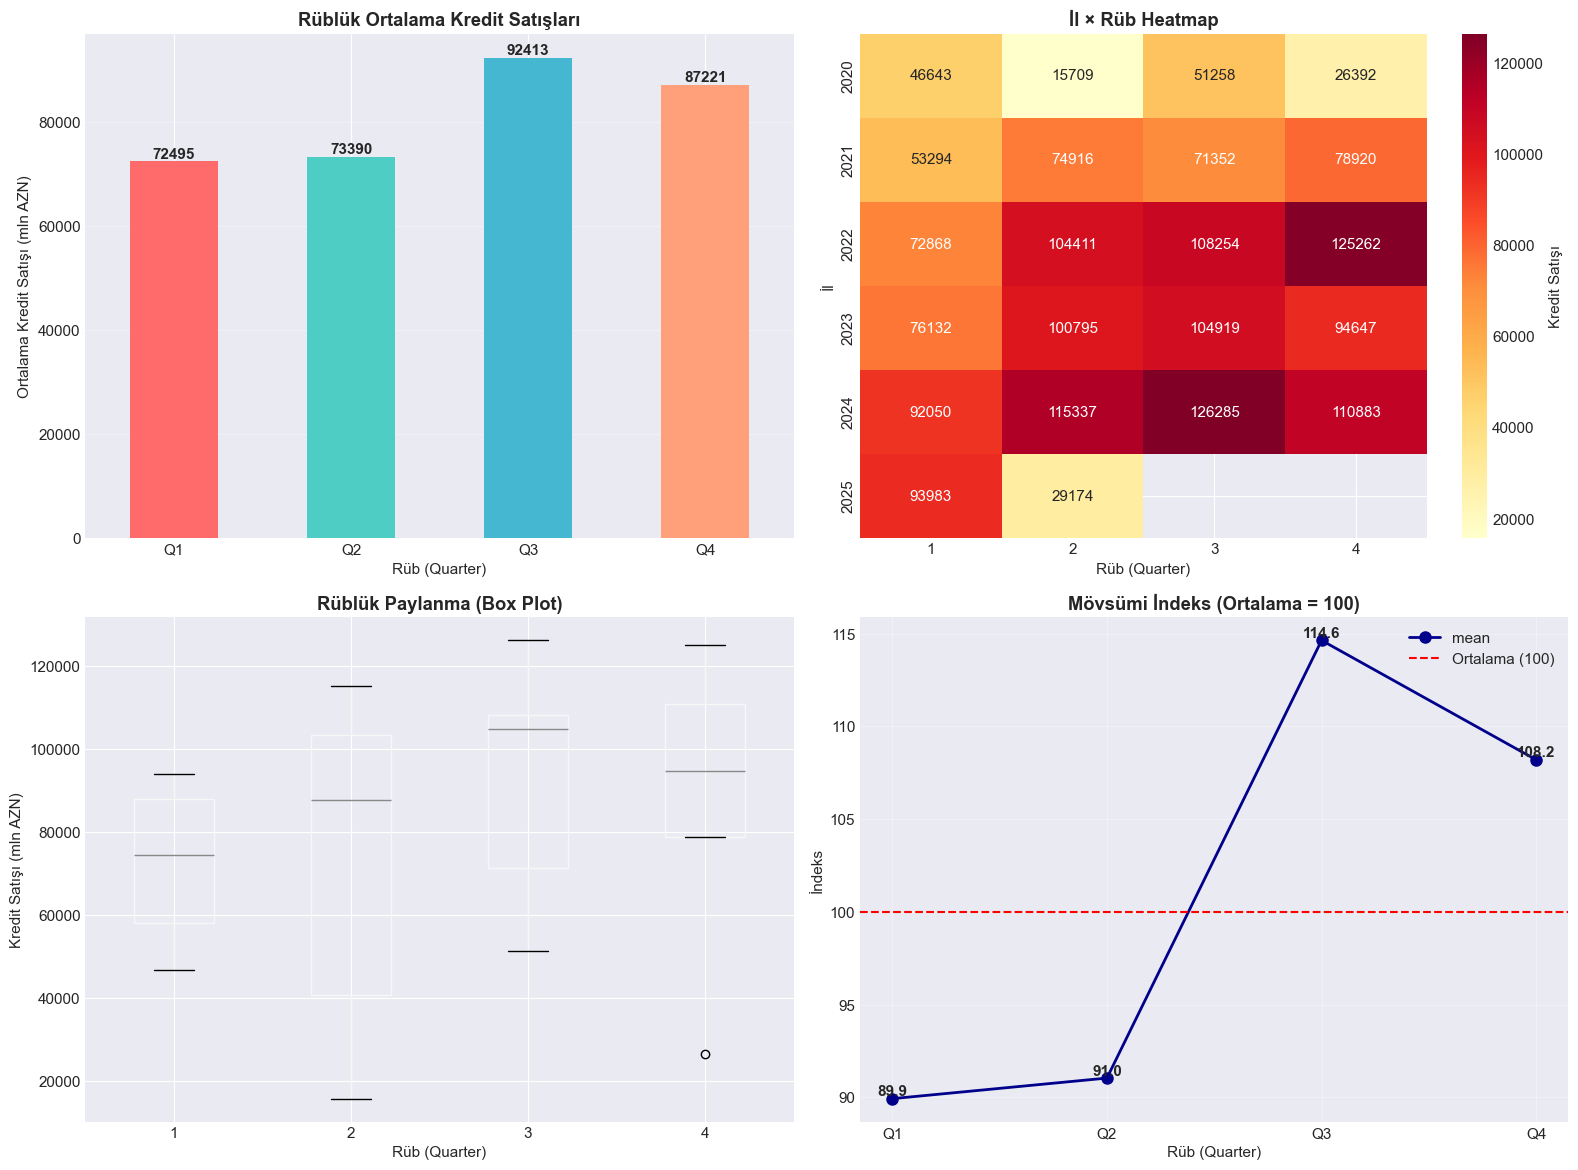


📊 MÖVSÜMSAL ANALİZ NƏTİCƏLƏRİ

🔬 ANOVA Test:
   F-statistika: 0.4827
   P-value: 0.6985
   ❌ Rüblər arasında statistik fərq yoxdur (p >= 0.05)

🏆 Ən yaxşı rüb: Q3 (ortalama: 92413 mln AZN)
🔻 Ən zəif rüb: Q1 (ortalama: 72495 mln AZN)
📈 Fərq: 19919 mln AZN (27.5%)

💡 STRATEJİ TÖVSİYƏLƏR:
   ✅ Q3 rübündə aqressiv kredit satış kampaniyası
   ⚠️  Q1 rübündə risk idarəçiliyini gücləndirin
   📊 Rüblük hədəfləri mövsümi indeksə görə tənzimləyin


In [26]:
# Rüblük məlumatı ayırmaq
loan_sales = numeric_df['Nağd_pul_kredit_satışı']
quarters_data = df['Rüblər'].dropna()

# Rübləri parse etmək (format: "2020 I", "2020 II", "2020 III", "2020 IV")
years = []
quarters = []
quarter_map = {'I': 1, 'II': 2, 'III': 3, 'IV': 4}

for q in quarters_data:
    if pd.notna(q):
        q_str = str(q).strip()
        parts = q_str.split()
        if len(parts) >= 2:
            try:
                year = int(parts[0])
                quarter_roman = parts[1].strip()
                if quarter_roman in quarter_map:
                    years.append(year)
                    quarters.append(quarter_map[quarter_roman])
                else:
                    years.append(None)
                    quarters.append(None)
            except:
                years.append(None)
                quarters.append(None)
        else:
            years.append(None)
            quarters.append(None)
    else:
        years.append(None)
        quarters.append(None)

# Mövsümi DataFrame yaratmaq
seasonal_df = pd.DataFrame({
    'Year': years,
    'Quarter': quarters,
    'Credit_Sales': loan_sales.values[:len(years)]
})

# NaN dəyərləri silmək
seasonal_df = seasonal_df.dropna()

print(f"✅ Parsed {len(seasonal_df)} quarters successfully")
print(f"   Year range: {seasonal_df['Year'].min():.0f} - {seasonal_df['Year'].max():.0f}")
print(f"   Quarter distribution:")
for q in [1, 2, 3, 4]:
    count = len(seasonal_df[seasonal_df['Quarter'] == q])
    print(f"      Q{q}: {count} observations")

# Mövsümi ortalamaları hesablamaq
quarterly_avg = seasonal_df.groupby('Quarter')['Credit_Sales'].agg(['mean', 'std', 'count'])
print(f"\n📊 Quarterly Averages:")
print(quarterly_avg)

# Vizualizasiyalar
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🗓️ MÖVSÜMSAL PATTERN ANALİZİ', fontsize=16, fontweight='bold')

# 1. Rüblük ortalamalar
ax1 = axes[0, 0]
quarterly_avg['mean'].plot(kind='bar', ax=ax1, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
ax1.set_title('Rüblük Ortalama Kredit Satışları', fontweight='bold')
ax1.set_xlabel('Rüb (Quarter)')
ax1.set_ylabel('Ortalama Kredit Satışı (mln AZN)')
ax1.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'], rotation=0)
ax1.grid(axis='y', alpha=0.3)

# Dəyərləri göstərmək
for i, v in enumerate(quarterly_avg['mean']):
    ax1.text(i, v, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

# 2. İl × Rüb Heatmap
ax2 = axes[0, 1]
pivot_table = seasonal_df.pivot_table(values='Credit_Sales', index='Year', columns='Quarter', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax2, cbar_kws={'label': 'Kredit Satışı'})
ax2.set_title('İl × Rüb Heatmap', fontweight='bold')
ax2.set_xlabel('Rüb (Quarter)')
ax2.set_ylabel('İl')

# 3. Box plot
ax3 = axes[1, 0]
seasonal_df.boxplot(column='Credit_Sales', by='Quarter', ax=ax3)
ax3.set_title('Rüblük Paylanma (Box Plot)', fontweight='bold')
ax3.set_xlabel('Rüb (Quarter)')
ax3.set_ylabel('Kredit Satışı (mln AZN)')
ax3.get_figure().suptitle('')

# 4. Mövsümi indeks
ax4 = axes[1, 1]
overall_mean = seasonal_df['Credit_Sales'].mean()
seasonal_index = (quarterly_avg['mean'] / overall_mean) * 100
seasonal_index.plot(kind='line', marker='o', ax=ax4, color='darkblue', linewidth=2, markersize=8)
ax4.axhline(y=100, color='red', linestyle='--', label='Ortalama (100)')
ax4.set_title('Mövsümi İndeks (Ortalama = 100)', fontweight='bold')
ax4.set_xlabel('Rüb (Quarter)')
ax4.set_ylabel('İndeks')
ax4.set_xticks([1, 2, 3, 4])
ax4.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
ax4.grid(True, alpha=0.3)
ax4.legend()

# İndeks dəyərlərini göstərmək
for i, v in enumerate(seasonal_index, 1):
    ax4.text(i, v, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# ANOVA test - Rüblər arasında əhəmiyyətli fərq varmı?
q1 = seasonal_df[seasonal_df['Quarter'] == 1]['Credit_Sales']
q2 = seasonal_df[seasonal_df['Quarter'] == 2]['Credit_Sales']
q3 = seasonal_df[seasonal_df['Quarter'] == 3]['Credit_Sales']
q4 = seasonal_df[seasonal_df['Quarter'] == 4]['Credit_Sales']

f_stat, p_value = stats.f_oneway(q1, q2, q3, q4)

print("\n" + "="*80)
print("📊 MÖVSÜMSAL ANALİZ NƏTİCƏLƏRİ")
print("="*80)
print(f"\n🔬 ANOVA Test:")
print(f"   F-statistika: {f_stat:.4f}")
print(f"   P-value: {p_value:.4f}")

if p_value < 0.05:
    print(f"   ✅ Rüblər arasında statistik cəhətdən əhəmiyyətli fərq var (p < 0.05)")
else:
    print(f"   ❌ Rüblər arasında statistik fərq yoxdur (p >= 0.05)")

print(f"\n🏆 Ən yaxşı rüb: Q{quarterly_avg['mean'].idxmax()} (ortalama: {quarterly_avg['mean'].max():.0f} mln AZN)")
print(f"🔻 Ən zəif rüb: Q{quarterly_avg['mean'].idxmin()} (ortalama: {quarterly_avg['mean'].min():.0f} mln AZN)")
print(f"📈 Fərq: {quarterly_avg['mean'].max() - quarterly_avg['mean'].min():.0f} mln AZN ({((quarterly_avg['mean'].max() / quarterly_avg['mean'].min() - 1) * 100):.1f}%)")

print("\n💡 STRATEJİ TÖVSİYƏLƏR:")
best_q = quarterly_avg['mean'].idxmax()
worst_q = quarterly_avg['mean'].idxmin()
print(f"   ✅ Q{best_q} rübündə aqressiv kredit satış kampaniyası")
print(f"   ⚠️  Q{worst_q} rübündə risk idarəçiliyini gücləndirin")
print(f"   📊 Rüblük hədəfləri mövsümi indeksə görə tənzimləyin")
print("="*80)


### 7.2 Uçot Faiz Dərəcəsi (Discount Rate) Təhlili

**Uçot faiz dərəcəsi nədir?**
- Mərkəzi Bankın əsas siyasət aləti
- Kommersiya banklarına verilən kreditlərin faiz dərəcəsi
- Monetar siyasətin əsas göstəricisi

**Necə təsir edir?**
- **Yüksək faiz:** Kredit BAHA → Tələb AZALIR → Satışlar AZALIR
- **Aşağı faiz:** Kredit UCUZ → Tələb ARTAR → Satışlar ARTAR

**Gözlənilən əlaqə:** MƏNFİ (faiz artanda satış azalır)

**AMMA:** Azərbaycanda paradoks ola bilər:
- Yüksək faiz = yüksək inflyasiya gözləntisi = indi almaq daha yaxşı
- Aşağı faiz = iqtisadi durğunluq = az tələb

#### 7.2.1 Uçot Faiz Dərəcəsi və Kredit Satışları - Detal Təhlil


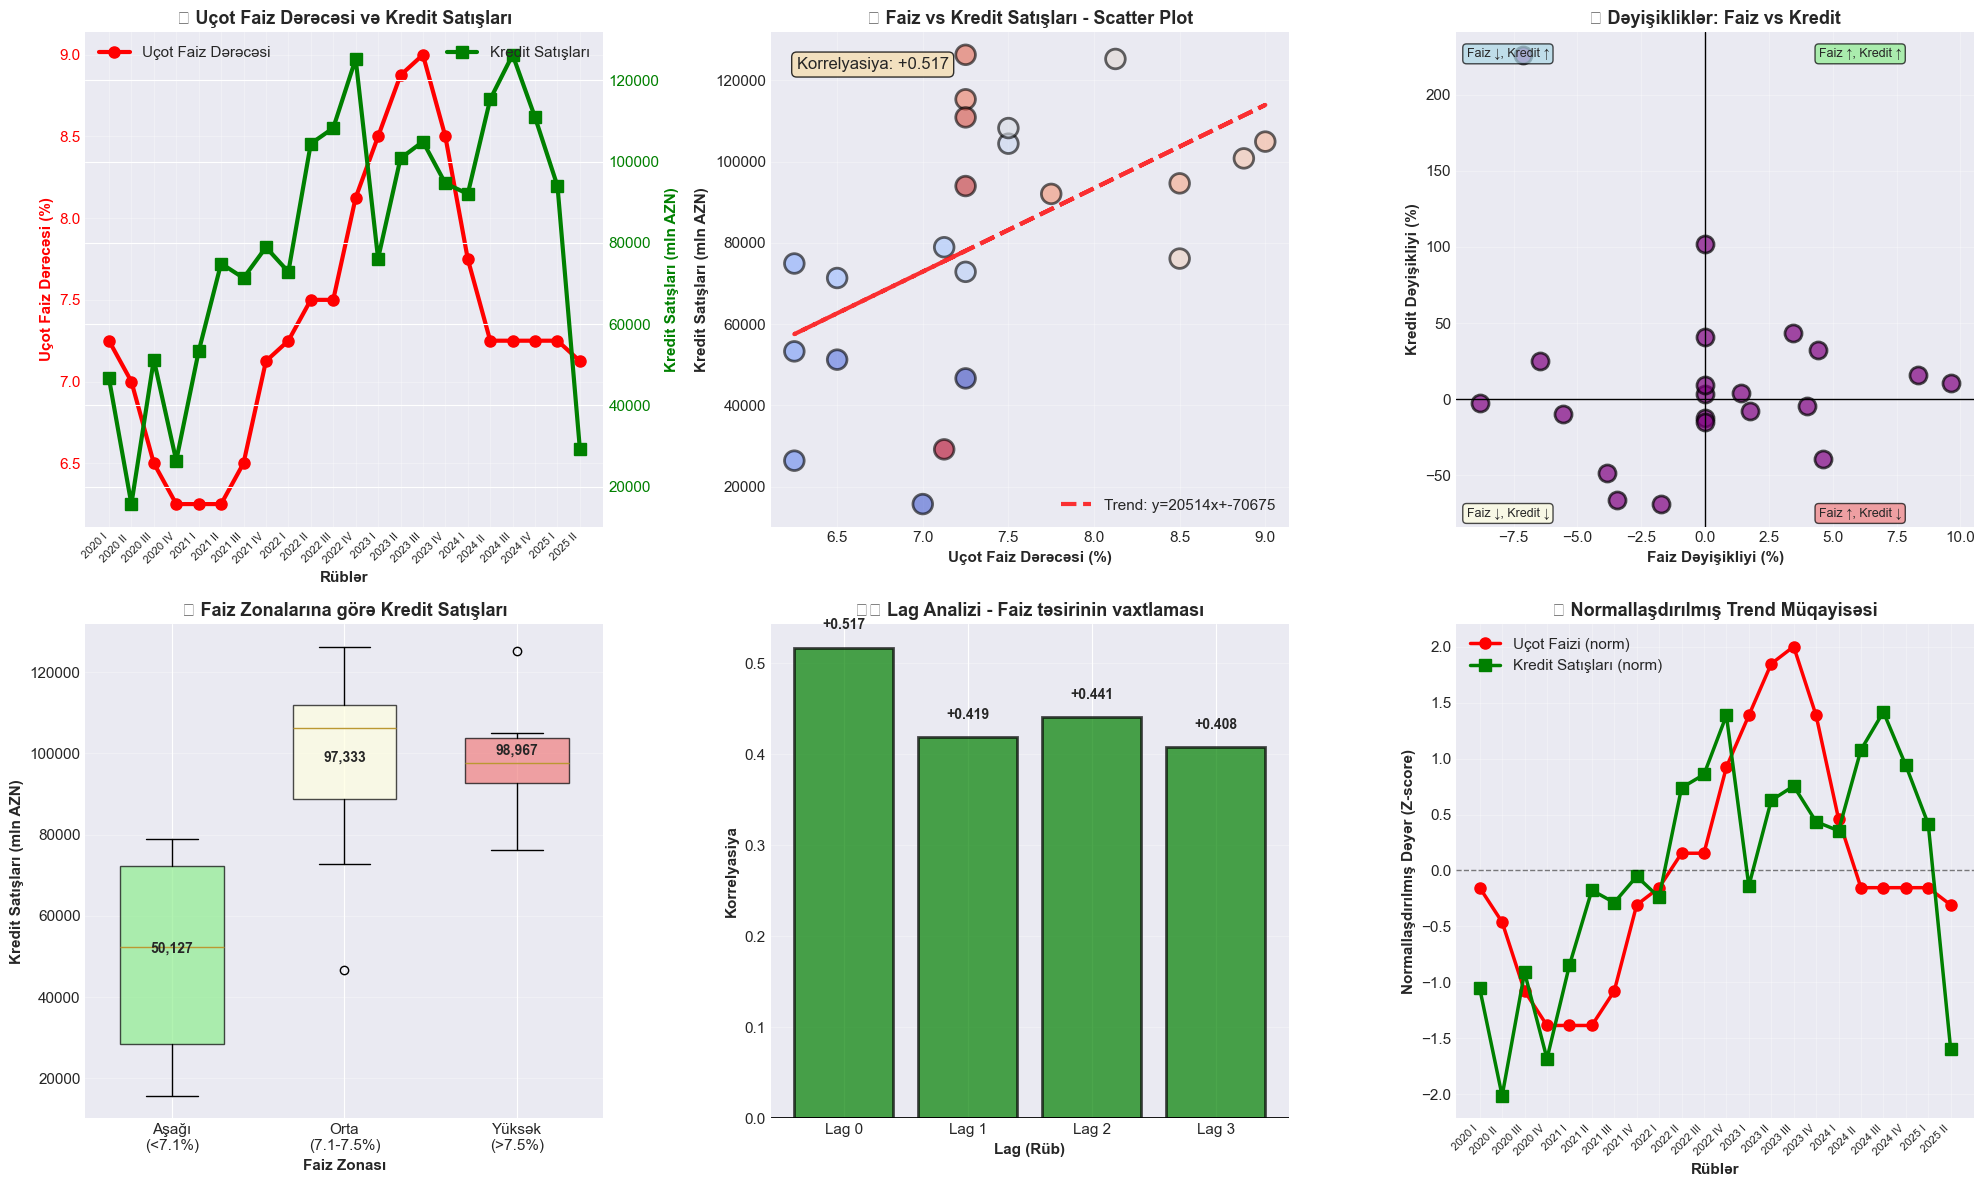


💰 UÇOT FAİZ DƏRƏCƏSİ (DISCOUNT RATE) TƏHLİLİ

📊 ƏSAS STATİSTİKA:
   Müşahidə sayı:        22
   Ortalama faiz:        7.38%
   Median faiz:          7.25%
   Minimum faiz:         6.25%
   Maksimum faiz:        9.00%
   Standart Sapma:       0.81%
   Dəyişkənlik (CV):     11.0%

🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:
   Korrelyasiya:         +0.517
   Əlaqə tipi:           Müsbət (Paradoks!)
   Əlaqə gücü:           Güclü
   Sıra:                 Top 5-də

📦 FAİZ ZONALARINA GÖRƏ KREDİT SATIŞLARI:
   Aşağı Faiz Zonası (<7.1%):
      • Ortalama kredit:  50,127 mln AZN
      • Müşahidə sayı:    8
   Orta Faiz Zonası (7.1-7.5%):
      • Ortalama kredit:  97,333 mln AZN
      • Müşahidə sayı:    8
   Yüksək Faiz Zonası (>7.5%):
      • Ortalama kredit:  98,967 mln AZN
      • Müşahidə sayı:    6

   📊 AŞAĞI vs YÜKSƏK ZONA FƏRQ: -49.4%

⏱️  LAG ANALİZİ (Təsirin Vaxtlaması):
   Lag 0 (0 rüb sonra): +0.517 ƏN GÜCLÜ
   Lag 1 (1 rüb sonra): +0.419 
   Lag 2 (2 rüb sonra): +0.441 
   Lag 3 (3 rüb sonra):

In [27]:
# Məlumatı hazırlamaq
discount_rate = numeric_df['Uçot_faiz_dərəcəsi'].dropna() * 100  # Faizə çevirmək
credit_sales_dr = numeric_df['Nağd_pul_kredit_satışı'].dropna()

# Valid indekslər
valid_dr_idx = discount_rate.index.intersection(credit_sales_dr.index)
discount_rate_valid = discount_rate.loc[valid_dr_idx]
credit_sales_dr_valid = credit_sales_dr.loc[valid_dr_idx]
quarters_dr = df.loc[valid_dr_idx, 'Rüblər'].values

# Vizualizasiya
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. İki oxlu qrafik - Faiz və Kredit Satışları
ax1 = axes[0, 0]
ax1_twin = ax1.twinx()

ax1.plot(range(len(valid_dr_idx)), discount_rate_valid, 'r-', 
         linewidth=3, marker='o', markersize=8, label='Uçot Faiz Dərəcəsi')
ax1_twin.plot(range(len(valid_dr_idx)), credit_sales_dr_valid, 'g-', 
              linewidth=3, marker='s', markersize=8, label='Kredit Satışları')

ax1.set_xlabel('Rüblər', fontsize=11, fontweight='bold')
ax1.set_ylabel('Uçot Faiz Dərəcəsi (%)', fontsize=11, fontweight='bold', color='red')
ax1_twin.set_ylabel('Kredit Satışları (mln AZN)', fontsize=11, fontweight='bold', color='green')
ax1.set_title('🔄 Uçot Faiz Dərəcəsi və Kredit Satışları', fontsize=13, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='red')
ax1_twin.tick_params(axis='y', labelcolor='green')
ax1.set_xticks(range(len(quarters_dr)))
ax1.set_xticklabels(quarters_dr, rotation=45, ha='right', fontsize=8)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')
ax1_twin.legend(loc='upper right')

# 2. Scatter Plot və Korrelyasiya
axes[0, 1].scatter(discount_rate_valid, credit_sales_dr_valid, 
                   s=200, alpha=0.6, edgecolors='black', linewidth=2, 
                   c=range(len(valid_dr_idx)), cmap='coolwarm')

# Trend xətti
z = np.polyfit(discount_rate_valid, credit_sales_dr_valid, 1)
p = np.poly1d(z)
axes[0, 1].plot(discount_rate_valid, p(discount_rate_valid), 
                "r--", linewidth=3, alpha=0.8, label=f'Trend: y={z[0]:.0f}x+{z[1]:.0f}')

# Korrelyasiya əmsalı
corr_dr = correlations['Uçot_faiz_dərəcəsi']
axes[0, 1].text(0.05, 0.95, f'Korrelyasiya: {corr_dr:+.3f}', 
                transform=axes[0, 1].transAxes, fontsize=12, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

axes[0, 1].set_xlabel('Uçot Faiz Dərəcəsi (%)', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Kredit Satışları (mln AZN)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('🎯 Faiz vs Kredit Satışları - Scatter Plot', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Faiz Dəyişikliyi və Kredit Dəyişikliyi
dr_change = discount_rate_valid.pct_change() * 100
cs_change = credit_sales_dr_valid.pct_change() * 100

axes[0, 2].scatter(dr_change, cs_change, s=150, alpha=0.7, 
                   edgecolors='black', linewidth=2, c='purple')
axes[0, 2].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0, 2].axvline(x=0, color='black', linestyle='-', linewidth=1)

# Kvadrantları etiketləmək
axes[0, 2].text(0.7, 0.95, 'Faiz ↑, Kredit ↑', transform=axes[0, 2].transAxes, 
                fontsize=9, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
axes[0, 2].text(0.02, 0.95, 'Faiz ↓, Kredit ↑', transform=axes[0, 2].transAxes, 
                fontsize=9, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
axes[0, 2].text(0.7, 0.02, 'Faiz ↑, Kredit ↓', transform=axes[0, 2].transAxes, 
                fontsize=9, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
axes[0, 2].text(0.02, 0.02, 'Faiz ↓, Kredit ↓', transform=axes[0, 2].transAxes, 
                fontsize=9, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

axes[0, 2].set_xlabel('Faiz Dəyişikliyi (%)', fontsize=11, fontweight='bold')
axes[0, 2].set_ylabel('Kredit Dəyişikliyi (%)', fontsize=11, fontweight='bold')
axes[0, 2].set_title('📊 Dəyişikliklər: Faiz vs Kredit', fontsize=13, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# 4. Faiz Zonaları və Kredit Performansı
# Faiz zonalarını müəyyənləşdirmək
dr_low_threshold = discount_rate_valid.quantile(0.33)
dr_high_threshold = discount_rate_valid.quantile(0.67)

low_zone = credit_sales_dr_valid[discount_rate_valid <= dr_low_threshold]
mid_zone = credit_sales_dr_valid[(discount_rate_valid > dr_low_threshold) & 
                                   (discount_rate_valid <= dr_high_threshold)]
high_zone = credit_sales_dr_valid[discount_rate_valid > dr_high_threshold]

zone_data = [low_zone.values, mid_zone.values, high_zone.values]
zone_labels = [f'Aşağı\n(<{dr_low_threshold:.1f}%)', 
               f'Orta\n({dr_low_threshold:.1f}-{dr_high_threshold:.1f}%)', 
               f'Yüksək\n(>{dr_high_threshold:.1f}%)']

bp = axes[1, 0].boxplot(zone_data, labels=zone_labels, patch_artist=True, widths=0.6)
colors_zones = ['lightgreen', 'lightyellow', 'lightcoral']
for patch, color in zip(bp['boxes'], colors_zones):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1, 0].set_xlabel('Faiz Zonası', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Kredit Satışları (mln AZN)', fontsize=11, fontweight='bold')
axes[1, 0].set_title('📦 Faiz Zonalarına görə Kredit Satışları', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Ortalama dəyərləri əlavə etmək
for i, zone in enumerate([low_zone, mid_zone, high_zone]):
    if len(zone) > 0:
        axes[1, 0].text(i+1, zone.mean(), f'{zone.mean():,.0f}', 
                        ha='center', va='bottom', fontsize=10, fontweight='bold')

# 5. Lag Analizi - Faiz dəyişikliyinin təsiri neçə rübdən sonra görünür?
lags = [0, 1, 2, 3]
lag_corrs = []
for lag in lags:
    if lag == 0:
        lag_corr = discount_rate_valid.corr(credit_sales_dr_valid)
    else:
        dr_shifted = discount_rate_valid.shift(lag)
        lag_corr = dr_shifted.corr(credit_sales_dr_valid)
    lag_corrs.append(lag_corr)

axes[1, 1].bar(lags, lag_corrs, alpha=0.7, edgecolor='black', linewidth=2,
               color=['green' if x > 0 else 'red' for x in lag_corrs])
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=2)
axes[1, 1].set_xlabel('Lag (Rüb)', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Korrelyasiya', fontsize=11, fontweight='bold')
axes[1, 1].set_title('⏱️ Lag Analizi - Faiz təsirinin vaxtlaması', fontsize=13, fontweight='bold')
axes[1, 1].set_xticks(lags)
axes[1, 1].set_xticklabels([f'Lag {l}' for l in lags])
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Hər bar üçün dəyəri yazmaq
for i, (lag, corr) in enumerate(zip(lags, lag_corrs)):
    axes[1, 1].text(i, corr + 0.02 if corr > 0 else corr - 0.02, 
                    f'{corr:+.3f}', ha='center', fontsize=10, fontweight='bold')

# 6. Faiz və Kredit - Normallaşdırılmış Trend
dr_norm = (discount_rate_valid - discount_rate_valid.mean()) / discount_rate_valid.std()
cs_norm = (credit_sales_dr_valid - credit_sales_dr_valid.mean()) / credit_sales_dr_valid.std()

axes[1, 2].plot(range(len(valid_dr_idx)), dr_norm, 'r-', 
                linewidth=2.5, marker='o', markersize=8, label='Uçot Faizi (norm)')
axes[1, 2].plot(range(len(valid_dr_idx)), cs_norm, 'g-', 
                linewidth=2.5, marker='s', markersize=8, label='Kredit Satışları (norm)')
axes[1, 2].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 2].set_xlabel('Rüblər', fontsize=11, fontweight='bold')
axes[1, 2].set_ylabel('Normallaşdırılmış Dəyər (Z-score)', fontsize=11, fontweight='bold')
axes[1, 2].set_title('📈 Normallaşdırılmış Trend Müqayisəsi', fontsize=13, fontweight='bold')
axes[1, 2].set_xticks(range(len(quarters_dr)))
axes[1, 2].set_xticklabels(quarters_dr, rotation=45, ha='right', fontsize=8)
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistik Təhlil
print("\n" + "="*100)
print("💰 UÇOT FAİZ DƏRƏCƏSİ (DISCOUNT RATE) TƏHLİLİ")
print("="*100)

print(f"\n📊 ƏSAS STATİSTİKA:")
print(f"   Müşahidə sayı:        {len(discount_rate_valid)}")
print(f"   Ortalama faiz:        {discount_rate_valid.mean():.2f}%")
print(f"   Median faiz:          {discount_rate_valid.median():.2f}%")
print(f"   Minimum faiz:         {discount_rate_valid.min():.2f}%")
print(f"   Maksimum faiz:        {discount_rate_valid.max():.2f}%")
print(f"   Standart Sapma:       {discount_rate_valid.std():.2f}%")
print(f"   Dəyişkənlik (CV):     {(discount_rate_valid.std()/discount_rate_valid.mean()*100):.1f}%")

print(f"\n🔗 KREDİT SATIŞLARI İLƏ ƏLAQƏ:")
print(f"   Korrelyasiya:         {corr_dr:+.3f}")
print(f"   Əlaqə tipi:           {'Müsbət (Paradoks!)' if corr_dr > 0 else 'Mənfi (Gözlənilən)'}")
print(f"   Əlaqə gücü:           {'Güclü' if abs(corr_dr) > 0.5 else 'Orta' if abs(corr_dr) > 0.3 else 'Zəif'}")
print(f"   Sıra:                 {'Top 5-də' if abs(corr_dr) > 0.5 else 'Top 10-da' if abs(corr_dr) > 0.3 else 'Aşağı təsir'}")

# Zona analizi
print(f"\n📦 FAİZ ZONALARINA GÖRƏ KREDİT SATIŞLARI:")
print(f"   Aşağı Faiz Zonası (<{dr_low_threshold:.1f}%):")
print(f"      • Ortalama kredit:  {low_zone.mean():,.0f} mln AZN")
print(f"      • Müşahidə sayı:    {len(low_zone)}")
print(f"   Orta Faiz Zonası ({dr_low_threshold:.1f}-{dr_high_threshold:.1f}%):")
print(f"      • Ortalama kredit:  {mid_zone.mean():,.0f} mln AZN")
print(f"      • Müşahidə sayı:    {len(mid_zone)}")
print(f"   Yüksək Faiz Zonası (>{dr_high_threshold:.1f}%):")
print(f"      • Ortalama kredit:  {high_zone.mean():,.0f} mln AZN")
print(f"      • Müşahidə sayı:    {len(high_zone)}")

# Fərqlər
if len(low_zone) > 0 and len(high_zone) > 0:
    diff_low_high = ((low_zone.mean() - high_zone.mean()) / high_zone.mean()) * 100
    print(f"\n   📊 AŞAĞI vs YÜKSƏK ZONA FƏRQ: {diff_low_high:+.1f}%")

# Lag analizi
print(f"\n⏱️  LAG ANALİZİ (Təsirin Vaxtlaması):")
for lag, corr in zip(lags, lag_corrs):
    interpretation = "ƏN GÜCLÜ" if abs(corr) == max([abs(c) for c in lag_corrs]) else ""
    print(f"   Lag {lag} ({lag} rüb sonra): {corr:+.3f} {interpretation}")

best_lag = lags[np.argmax([abs(c) for c in lag_corrs])]
print(f"\n   ✅ Faiz dəyişikliyinin ən güclü təsiri: {best_lag} rüb sonra görünür")

print(f"\n💡 TƏHLİL NƏTİCƏSİ:")

if corr_dr > 0.3:
    print(f"   ⚠️  PARADOKS: Faiz artanda kredit satışları da ARTIR!")
    print(f"   📌 Mümkün izahlar:")
    print(f"      1. Yüksək faiz = yüksək inflyasiya gözləntisi → indi almaq daha sərfəli")
    print(f"      2. Faiz artımı iqtisadi aktivlik dövrü ilə üst-üstə düşür")
    print(f"      3. Supply-side effekt: Yüksək faizlə bank daha çox kredit verə bilir")
    print(f"      4. Gec təsir (lag effect): Faiz təsiri dərhal görünmür")
elif corr_dr < -0.3:
    print(f"   ✅ GÖZLƏNİLƏN NƏTİCƏ: Faiz artanda kredit satışları AZALIR")
    print(f"   📌 Klassik monetar siyasət təsiri işləyir:")
    print(f"      • Yüksək faiz → baha kredit → az tələb")
    print(f"      • Aşağı faiz → ucuz kredit → çox tələb")
else:
    print(f"   🟡 ZƏİF ƏLAQƏ: Faizin kredit satışlarına birbaşa təsiri MƏHDUDDUR")
    print(f"   📌 Mümkün izahlar:")
    print(f"      1. Başqa faktorlar daha güclü təsir edir (GDP, Neft)")
    print(f"      2. Faiz dəyişikliyi kifayət qədər deyil")
    print(f"      3. Bazar qeyri-elastikdir (faizə həssas deyil)")

print(f"\n🎯 STRATEJİ TÖVSİYƏ:")
if abs(corr_dr) > 0.5:
    print(f"   ✅ Uçot faiz dərəcəsi vacib predikatordur - MONITORINQ edilməlidir")
    print(f"   📌 Mərkəzi Bankın faiz qərarlarını proaktiv izləyin")
    print(f"   📌 Faiz dəyişikliyi elan edildikdə satış strategiyasını tənzimləyin")
else:
    print(f"   🟡 Uçot faiz dərəcəsi orta təsir göstərir")
    print(f"   📌 GDP və Neft qiymətinə daha çox fokus edin")
    print(f"   📌 Faizi ikinci dərəcəli göstərici kimi izləyin")

print("="*100)